['1000403940202', "'1000403940203", "'1000403940206", "'1000600164107", "'1000600164110", "'1001600066003", "'1001600066005", "'10020000611502", "'1002000063302", "'1002000063305", "'1002000063306", "'1002000063307", "'1002003933701", "'1002003933702", "'1002003933704", "'1002003933705", "'10020044127401", "'10020044127402", "'10020044127403", "'1004200045501", "'1004200045503", "'1004400337902", "'1004400337905", "'1004400337906", "'1005200524703", "'1005200524705", "'1005200524708", "'1005204362301", "'1005204362302", "'1005204362303", "'1005204362304", "'1011604219701", "'1011604219703", "'1011604219704", "'1011604219706", "'1011604229801", "'1011604229802", "'1011604239901", "'2000100012001", "'2000100012006", "'2000100012009", "'2000100012010", "'2000100142206", "'2000100142210", "'2000100321306", "'2001100126401", "'2001100126405", "'2001100126406", "'2001100126407", "'2001100126408", "'2001100126409", "'2001100126410", "'2001100136901", "'2001100136903", "'2001100136904", "'2001

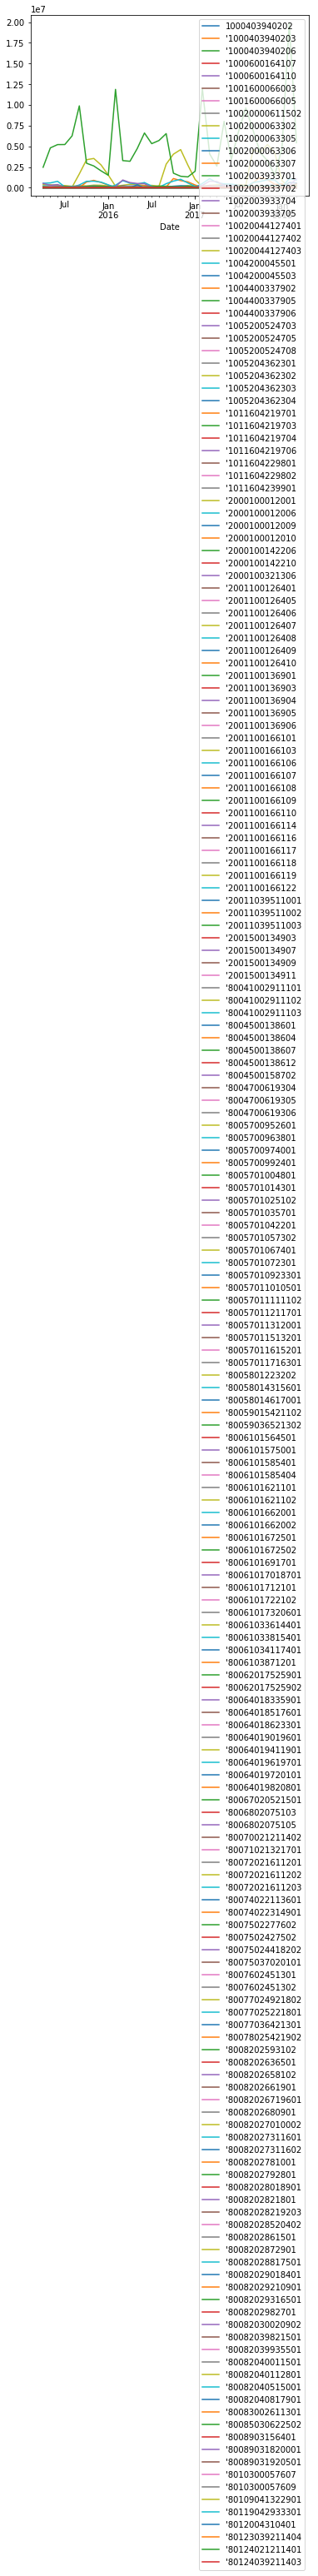

In [8]:
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
def parser(x):
    return datetime.strptime(x , '%d/%m/%Y')
ColumnList=[]

series= read_csv('DP26-skus monthly sales (FILTERED2).csv', parse_dates=['Date'] , index_col='Date', date_parser=parser)
for columns in series:
    ColumnList.append(columns)
print (ColumnList)
print(series.head())
series.plot()
pyplot.show()

In [9]:
model={}
ColName=[]
DoubleExpo_mape=[]
DoubleExpo_conf=[]
DoubleExpo_sum_error=[]
DoubleExpo_forecast_sum=[]
model['DoubleExpo_mape']=DoubleExpo_mape
model['DoubleExpo_conf']=DoubleExpo_conf
model['DoubleExpo_absolute_error']=DoubleExpo_sum_error
model['DoubleExpo forecast sum']=DoubleExpo_forecast_sum
model['ColName']=ColName

In [10]:
model2={}
DoubleExpo_forecast=[]
SKU=[]
model2['DoubleExpo_forecast']=DoubleExpo_forecast
model2['SKU']=SKU

In [11]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return (((np.sum(np.abs(y_true - y_pred))) / (np.sum(y_pred))) * 100)

In [12]:
def movingavg(series,l,u):
    min = 999999999999999
    for w in range (l,u+1):
        result=[]
        for j in range(w):
            result.append(series[j])
        for i in range (w,len(series)):
            result.append((sum(series[i-w:i]))/w)
        mape=mean_absolute_percentage_error(series[24:],result[24:])
        #print result
        if (0<=mape<min):
            min=mape
            minW=w
            minr=result
        print ('Window-size {} - mape {}'.format(w,mape))
    absolute_error=(min/100)*sum(minr[24:])
    forecast_sum=sum(minr[24:])
    print ('Min mape is {} - window size {} - absolute error {} - forecast sum {}'.format(mape,minW,absolute_error,forecast_sum))
    movingavg_mape.append(min)
    movingavg_conf.append(minW)
    movingavg_sum_error.append(absolute_error)
    movingavg_forecast_sum.append(forecast_sum)
    movingavg_forecast.extend(minr)
    return minr
def exponential_smoothing(series, alphaL,alphaU):
    alphal=int(10*alphaL)
    alphau=int(10*alphaU)
    min = 999999999999999
    
    for alpha in range (alphal, alphau+1):
        result=[]
        result = [series[0]] # first value is same as series
        for n in range(1, (len(series))):
            result.append((alpha/10.0) * series[n-1] + (1 - (alpha/10.0)) * result[n-1])
        mape=mean_absolute_percentage_error(series[24:],result[24:])
        #print result
        if (0<=mape<min):
            min=mape
            minalpha=(alpha/10.0)
            minr=result
        print ('alpha {} - mape {}'.format((alpha/10.0),mape))
    absolute_error=(min/100)*sum(minr[24:])
    forecast_sum=sum(minr[24:])
    print ('best alpha {} - mape is {} - absolute error {} - forecast sum {}'.format(minalpha,min,absolute_error,forecast_sum))
    simpleExpo_mape.append(min)
    simpleExpo_conf.append(minalpha)
    simpleExpo_sum_error.append(absolute_error)
    simpleExpo_forecast_sum.append(forecast_sum)
    simpleExpo_forecast.extend(minr)
    return minr

def double_exponential_smoothing(series, alphaL, alphaU, betaL, betaU):
    alphal=int(10*alphaL)
    alphau=int(10*alphaU)
    betal=int(10*betaL)
    betau=int(10*betaU)
    min = 999999999999999
    
    for alpha in range (alphal, alphau+1):
        result=[]
        for beta in range (betal, betau+1):
            result = [series[0], series[0]]
            for n in range(2, len(series)):
                if n == 2:
                    level, trend = series[0], series[1] - series[0]
                if n <= len(series): # we are forecasting
                    value = series[n-1]
                last_level, level = level, (alpha/10.0)*value + (1-(alpha/10.0))*(level+trend)
                trend = (beta/10.0)*(level-last_level) + (1-(beta/10.0))*trend
                result.append(level+trend)
            mape=mean_absolute_percentage_error(series[24:],result[24:])
            #print result
            if (0<=mape<min):
                min=mape
                minalpha=(alpha/10.0)
                minbeta=(beta/10.0)
                minr=result
            print ('alpha {} - beta {} - mape {}'.format((alpha/10.0),(beta/10.0),mape))
    absolute_error=(min/100)*sum(minr[24:])
    forecast_sum=sum(minr[24:])
    print ('min alpha {} - min beta {} - mape {} - absolute error {} - forecast sum {}'.format(minalpha,minbeta,min,absolute_error,forecast_sum))
    DoubleExpo_mape.append(min)
    DoubleExpo_conf.append([minalpha,minbeta])
    DoubleExpo_sum_error.append(absolute_error)
    DoubleExpo_forecast_sum.append(forecast_sum)
    DoubleExpo_forecast.extend(minr)
    return minr

def M_initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen
def M_initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals
def M_triple_exponential_smoothing(series, slenL, slenU, alphaL, alphaU, betaL, betaU, gammaL, gammaU, n_preds):
    alphal=int(10*alphaL)
    alphau=int(10*alphaU)
    betal=int(10*betaL)
    betau=int(10*betaU)
    gammal=int(10*gammaL)
    gammau=int(10*gammaU)
    min = 999999999999999
    min2=999999999999999
    for slen in range (slenL, slenU+1):
        try:
            for alpha in range (alphal, alphau+1):
                for beta in range (betal, betau+1):
                    for gamma in range (gammal, gammau+1):
                        result=[]
                        seasonals = M_initial_seasonal_components(series, slen)
                        for i in range(len(series)+n_preds):
                            if i == 0: # initial values
                                smooth = series[0]
                                trend = M_initial_trend(series, slen)
                                result.append(series[0])
                                continue
                            if i >= len(series): # we are forecasting
                                m = i - len(series) + 1
                                result.append((smooth + m*trend) * seasonals[i%slen])
                            else:
                                val = series[i-1]
                                last_smooth, smooth = smooth, (alpha/10.0)*(val/seasonals[i%slen]) + (1-(alpha/10.0))*(smooth+trend)
                                trend = (beta/10.0) * (smooth-last_smooth) + (1-(beta/10.0))*trend
                                seasonals[i%slen] = (gamma/10.0)*(val/smooth) + (1-(gamma/10.0))*seasonals[i%slen]
                                result.append((smooth+trend)*seasonals[i%slen])
                        mape=mean_absolute_percentage_error(series[24:],result[24:])
                        #print result
                        if (0<=mape<min):
                            min=mape
                            minalpha=(alpha/10.0)
                            minbeta=(beta/10.0)
                            mingamma=(gamma/10.0)
                            minr=result
                        print ('alpha {} - beta {} - gamma {} - mape {}'.format((alpha/10.0),(beta/10.0),(gamma/10.0),mape))
            print('best alpha {} - best beta {} - best gamma {} - mape {} - slen {}'.format(minalpha,minbeta,mingamma,min,slen))
        except:
            continue
        if (0<=min<min2):
            min2=min
            bestalpha=minalpha
            bestbeta=minbeta
            bestgamma=mingamma
            bestslen=slen
            bestr=minr
    absolute_error=(min2/100)*sum(bestr[24:])
    forecast_sum=sum(bestr[24:])
    print ('A {} - B {} - G {} - M {} - S {} - AE {} - FS {}'.format(bestalpha,bestbeta,bestgamma,min2,bestslen,absolute_error,forecast_sum))
    M_tripleExpo_mape.append(min2)
    M_tripleExpo_conf.append([bestalpha,bestbeta,bestgamma])
    M_tripleExpo_sum_error.append(absolute_error)
    M_tripleExpo_forecast_sum.append(forecast_sum)
    M_tripleExpo_forecast.extend(bestr)
    return bestr

def A_initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen
def A_initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals
def A_triple_exponential_smoothing(series, slenL, slenU, alphaL, alphaU, betaL, betaU, gammaL, gammaU, n_preds):
    alphal=int(10*alphaL)
    alphau=int(10*alphaU)
    betal=int(10*betaL)
    betau=int(10*betaU)
    gammal=int(10*gammaL)
    gammau=int(10*gammaU)
    min = 999999999999999
    min2=999999999999999
    for slen in range (slenL, slenU+1):
        try:
            for alpha in range (alphal, alphau+1):
                for beta in range (betal, betau+1):
                    for gamma in range (gammal, gammau+1):
                        result=[]
                        seasonals = A_initial_seasonal_components(series, slen)
                        for i in range(len(series)+n_preds):
                            if i == 0: # initial values
                                smooth = series[0]
                                trend = A_initial_trend(series, slen)
                                result.append(series[0])
                                continue
                            if i >= len(series): # we are forecasting
                                m = i - len(series) + 1
                                result.append((smooth + m*trend) + seasonals[i%slen])
                            else:
                                val = series[i-1]
                                last_smooth, smooth = smooth, (alpha/10.0)*(val-seasonals[i%slen]) + (1-(alpha/10.0))*(smooth+trend)
                                trend = (beta/10.0) * (smooth-last_smooth) + (1-(beta/10.0))*trend
                                seasonals[i%slen] = (gamma/10.0)*(val-smooth) + (1-(gamma/10.0))*seasonals[i%slen]
                                result.append(smooth+trend+seasonals[i%slen])
                        mape=mean_absolute_percentage_error(series[24:],result[24:])
                        #print result
                        if (0<=mape<min):
                            min=mape
                            minalpha=(alpha/10.0)
                            minbeta=(beta/10.0)
                            mingamma=(gamma/10.0)
                            minr=result
                        print ('alpha {} - beta {} - gamma {} - mape {}'.format((alpha/10.0),(beta/10.0),(gamma/10.0),mape))
            print('best alpha {} - best beta {} - best gamma {} - mape {} - slen {}'.format(minalpha,minbeta,mingamma,min,slen))
        except:
            continue
        if (0<=min<min2):
            min2=min
            bestalpha=minalpha
            bestbeta=minbeta
            bestgamma=mingamma
            bestslen=slen
            bestr=minr
    absolute_error=(min2/100)*sum(bestr[24:])
    forecast_sum=sum(bestr[24:])
    print ('A {} - B {} - G {} - M {} - S {} - AE {} - FS {}'.format(bestalpha,bestbeta,bestgamma,min2,bestslen,absolute_error,forecast_sum))
    A_tripleExpo_mape.append(min2)
    A_tripleExpo_conf.append([bestalpha,bestbeta,bestgamma])
    A_tripleExpo_sum_error.append(absolute_error)
    A_tripleExpo_forecast_sum.append(forecast_sum)
    A_tripleExpo_forecast.extend(bestr)
    return bestr

In [13]:
def forecasting ():
    for i in range(len(ColumnList)):
        ColName.append(ColumnList[i])
        for ik in range(0,36):
            SKU.append(ColumnList[i])
        print (ColumnList[i])
        print (i)
        print ("")
        double_exponential_smoothing(series[ColumnList[i]],0.1,0.9,0.1,0.9)

In [14]:
forecasting()

1000403940202
0

alpha 0.1 - beta 0.1 - mape -131.12530520341326
alpha 0.1 - beta 0.2 - mape 78.74773858803344
alpha 0.1 - beta 0.3 - mape 78.00090335292258
alpha 0.1 - beta 0.4 - mape 84.82888740114419
alpha 0.1 - beta 0.5 - mape 160.600253184214
alpha 0.1 - beta 0.6 - mape -2249.520701506886
alpha 0.1 - beta 0.7 - mape -280.3720895433736
alpha 0.1 - beta 0.8 - mape -292.44243554014895
alpha 0.1 - beta 0.9 - mape -958.7486745224995
alpha 0.2 - beta 0.1 - mape 101.80322772553734
alpha 0.2 - beta 0.2 - mape 51.348038056685866
alpha 0.2 - beta 0.3 - mape 54.36368045789061
alpha 0.2 - beta 0.4 - mape 75.91228541181486
alpha 0.2 - beta 0.5 - mape 69.85356615451207
alpha 0.2 - beta 0.6 - mape 64.97227622433806
alpha 0.2 - beta 0.7 - mape 69.19417603952871
alpha 0.2 - beta 0.8 - mape 79.89742169318127
alpha 0.2 - beta 0.9 - mape 82.77989542329223
alpha 0.3 - beta 0.1 - mape 70.753580450863
alpha 0.3 - beta 0.2 - mape 47.53955062139853
alpha 0.3 - beta 0.3 - mape 53.60057256346874
alpha 0.3 -

alpha 0.4 - beta 0.3 - mape 143.5049197886288
alpha 0.4 - beta 0.4 - mape 155.73782138461553
alpha 0.4 - beta 0.5 - mape 164.73855762568436
alpha 0.4 - beta 0.6 - mape 170.58764336563092
alpha 0.4 - beta 0.7 - mape 169.4612634323332
alpha 0.4 - beta 0.8 - mape 162.96614959796983
alpha 0.4 - beta 0.9 - mape 156.92080567965306
alpha 0.5 - beta 0.1 - mape 130.85155712900908
alpha 0.5 - beta 0.2 - mape 127.2483484720277
alpha 0.5 - beta 0.3 - mape 136.25674391399681
alpha 0.5 - beta 0.4 - mape 145.29817973390254
alpha 0.5 - beta 0.5 - mape 148.90312468211187
alpha 0.5 - beta 0.6 - mape 146.46201899562902
alpha 0.5 - beta 0.7 - mape 145.65707775650404
alpha 0.5 - beta 0.8 - mape 144.40786758223464
alpha 0.5 - beta 0.9 - mape 144.11526448286207
alpha 0.6 - beta 0.1 - mape 124.11724280636759
alpha 0.6 - beta 0.2 - mape 120.3227709077152
alpha 0.6 - beta 0.3 - mape 129.14633377949164
alpha 0.6 - beta 0.4 - mape 132.9227796905224
alpha 0.6 - beta 0.5 - mape 135.08462496830225
alpha 0.6 - beta 0

alpha 0.3 - beta 0.6 - mape 82.79601842988735
alpha 0.3 - beta 0.7 - mape 82.50733695917441
alpha 0.3 - beta 0.8 - mape 82.94412859686172
alpha 0.3 - beta 0.9 - mape 84.35725751798171
alpha 0.4 - beta 0.1 - mape 79.66609391256708
alpha 0.4 - beta 0.2 - mape 85.03342901114925
alpha 0.4 - beta 0.3 - mape 85.62098881737586
alpha 0.4 - beta 0.4 - mape 86.35546462266795
alpha 0.4 - beta 0.5 - mape 87.0657714268515
alpha 0.4 - beta 0.6 - mape 88.14805072836903
alpha 0.4 - beta 0.7 - mape 89.76585316409356
alpha 0.4 - beta 0.8 - mape 92.33380304629773
alpha 0.4 - beta 0.9 - mape 94.86249733582758
alpha 0.5 - beta 0.1 - mape 83.21153243066263
alpha 0.5 - beta 0.2 - mape 88.40228390299106
alpha 0.5 - beta 0.3 - mape 89.68347523290683
alpha 0.5 - beta 0.4 - mape 91.10330198598473
alpha 0.5 - beta 0.5 - mape 92.85993974006635
alpha 0.5 - beta 0.6 - mape 95.01977768812738
alpha 0.5 - beta 0.7 - mape 97.47301345172771
alpha 0.5 - beta 0.8 - mape 100.0717561834899
alpha 0.5 - beta 0.9 - mape 103.059

alpha 0.8 - beta 0.4 - mape 23.36713845241715
alpha 0.8 - beta 0.5 - mape 23.710454623028465
alpha 0.8 - beta 0.6 - mape 24.192009885856194
alpha 0.8 - beta 0.7 - mape 24.74605379764249
alpha 0.8 - beta 0.8 - mape 25.410969593388373
alpha 0.8 - beta 0.9 - mape 26.18661182362051
alpha 0.9 - beta 0.1 - mape 24.530647241053906
alpha 0.9 - beta 0.2 - mape 23.923310546857632
alpha 0.9 - beta 0.3 - mape 23.629349918234155
alpha 0.9 - beta 0.4 - mape 24.094492695689233
alpha 0.9 - beta 0.5 - mape 24.731181656356828
alpha 0.9 - beta 0.6 - mape 25.359289337719815
alpha 0.9 - beta 0.7 - mape 26.028198027366944
alpha 0.9 - beta 0.8 - mape 26.730773629243593
alpha 0.9 - beta 0.9 - mape 28.053198672710195
min alpha 0.5 - min beta 0.9 - mape 21.741565120217913 - absolute error 608109.1458251785 - forecast sum 2796988.8205503924
'1002000063305
9

alpha 0.1 - beta 0.1 - mape 37.93562709426879
alpha 0.1 - beta 0.2 - mape 57.65289862079952
alpha 0.1 - beta 0.3 - mape 69.85188474432653
alpha 0.1 - beta 0

alpha 0.2 - beta 0.6 - mape 65.36767546000056
alpha 0.2 - beta 0.7 - mape 71.26206684764104
alpha 0.2 - beta 0.8 - mape 70.03918279103917
alpha 0.2 - beta 0.9 - mape 64.6433119311068
alpha 0.3 - beta 0.1 - mape 29.413786607625674
alpha 0.3 - beta 0.2 - mape 29.582996398958418
alpha 0.3 - beta 0.3 - mape 35.1551433595134
alpha 0.3 - beta 0.4 - mape 40.760318567632595
alpha 0.3 - beta 0.5 - mape 42.24230901259241
alpha 0.3 - beta 0.6 - mape 41.14076020467076
alpha 0.3 - beta 0.7 - mape 38.37052646949204
alpha 0.3 - beta 0.8 - mape 35.305480501579275
alpha 0.3 - beta 0.9 - mape 37.15162137393781
alpha 0.4 - beta 0.1 - mape 30.63084013660124
alpha 0.4 - beta 0.2 - mape 31.64036062917017
alpha 0.4 - beta 0.3 - mape 34.029485975239325
alpha 0.4 - beta 0.4 - mape 35.20185426547185
alpha 0.4 - beta 0.5 - mape 34.46975697265342
alpha 0.4 - beta 0.6 - mape 33.6588672744413
alpha 0.4 - beta 0.7 - mape 35.30402277257016
alpha 0.4 - beta 0.8 - mape 36.201195155851366
alpha 0.4 - beta 0.9 - mape 36.

alpha 0.2 - beta 0.2 - mape 36.23221394774277
alpha 0.2 - beta 0.3 - mape 22.924131574847497
alpha 0.2 - beta 0.4 - mape 53.062673702764876
alpha 0.2 - beta 0.5 - mape 60.74983067939323
alpha 0.2 - beta 0.6 - mape 57.94878982729663
alpha 0.2 - beta 0.7 - mape 51.62735153056819
alpha 0.2 - beta 0.8 - mape 47.414649573362105
alpha 0.2 - beta 0.9 - mape 45.75313580613402
alpha 0.3 - beta 0.1 - mape 46.97957524265623
alpha 0.3 - beta 0.2 - mape 30.13508842003516
alpha 0.3 - beta 0.3 - mape 33.37544366637752
alpha 0.3 - beta 0.4 - mape 37.4855022996197
alpha 0.3 - beta 0.5 - mape 39.98615516085202
alpha 0.3 - beta 0.6 - mape 40.09764154334425
alpha 0.3 - beta 0.7 - mape 40.554392781744895
alpha 0.3 - beta 0.8 - mape 41.216634775719626
alpha 0.3 - beta 0.9 - mape 41.546211333227994
alpha 0.4 - beta 0.1 - mape 40.00198306759879
alpha 0.4 - beta 0.2 - mape 32.109906663227314
alpha 0.4 - beta 0.3 - mape 34.16739012990884
alpha 0.4 - beta 0.4 - mape 35.8087196695234
alpha 0.4 - beta 0.5 - mape 3

alpha 0.2 - beta 0.5 - mape 41.62900577208013
alpha 0.2 - beta 0.6 - mape 42.47552602399088
alpha 0.2 - beta 0.7 - mape 44.160714685181254
alpha 0.2 - beta 0.8 - mape 45.584512572009565
alpha 0.2 - beta 0.9 - mape 46.74511023431277
alpha 0.3 - beta 0.1 - mape 48.26569662518943
alpha 0.3 - beta 0.2 - mape 46.09706956793186
alpha 0.3 - beta 0.3 - mape 43.86391933146433
alpha 0.3 - beta 0.4 - mape 42.78313600021756
alpha 0.3 - beta 0.5 - mape 44.26219111310058
alpha 0.3 - beta 0.6 - mape 46.08093208787016
alpha 0.3 - beta 0.7 - mape 47.90034894618918
alpha 0.3 - beta 0.8 - mape 49.90635232804269
alpha 0.3 - beta 0.9 - mape 52.64715592060526
alpha 0.4 - beta 0.1 - mape 46.5181242888283
alpha 0.4 - beta 0.2 - mape 44.78163494558125
alpha 0.4 - beta 0.3 - mape 43.69564985531073
alpha 0.4 - beta 0.4 - mape 44.202214126946764
alpha 0.4 - beta 0.5 - mape 46.03996092516945
alpha 0.4 - beta 0.6 - mape 48.60477306080735
alpha 0.4 - beta 0.7 - mape 52.04022453160205
alpha 0.4 - beta 0.8 - mape 55.4

alpha 0.2 - beta 0.1 - mape 153.12307694561386
alpha 0.2 - beta 0.2 - mape 191.55947889431116
alpha 0.2 - beta 0.3 - mape 194.3407593899012
alpha 0.2 - beta 0.4 - mape 184.55219339072744
alpha 0.2 - beta 0.5 - mape 194.9662487537629
alpha 0.2 - beta 0.6 - mape 230.72206735032302
alpha 0.2 - beta 0.7 - mape 292.66851534352776
alpha 0.2 - beta 0.8 - mape 371.7809561518693
alpha 0.2 - beta 0.9 - mape 449.0627811459619
alpha 0.3 - beta 0.1 - mape 151.93296217915827
alpha 0.3 - beta 0.2 - mape 176.49672566355073
alpha 0.3 - beta 0.3 - mape 192.32064507776266
alpha 0.3 - beta 0.4 - mape 220.8757594788393
alpha 0.3 - beta 0.5 - mape 269.9077484420293
alpha 0.3 - beta 0.6 - mape 320.1464508865222
alpha 0.3 - beta 0.7 - mape 360.71950715603805
alpha 0.3 - beta 0.8 - mape 371.7900368654289
alpha 0.3 - beta 0.9 - mape 375.91816917547567
alpha 0.4 - beta 0.1 - mape 154.52751459592312
alpha 0.4 - beta 0.2 - mape 182.86399338549083
alpha 0.4 - beta 0.3 - mape 207.99547508667757
alpha 0.4 - beta 0.4 

alpha 0.3 - beta 0.5 - mape 221.44416798397296
alpha 0.3 - beta 0.6 - mape 243.69367012433875
alpha 0.3 - beta 0.7 - mape 257.9257524852232
alpha 0.3 - beta 0.8 - mape 257.86648687574154
alpha 0.3 - beta 0.9 - mape 256.73081401869854
alpha 0.4 - beta 0.1 - mape 142.9688422107114
alpha 0.4 - beta 0.2 - mape 161.78934522745587
alpha 0.4 - beta 0.3 - mape 179.21469476301968
alpha 0.4 - beta 0.4 - mape 198.42941978282852
alpha 0.4 - beta 0.5 - mape 209.6195557035652
alpha 0.4 - beta 0.6 - mape 217.80786031677715
alpha 0.4 - beta 0.7 - mape 216.40164851201837
alpha 0.4 - beta 0.8 - mape 210.16941153226853
alpha 0.4 - beta 0.9 - mape 215.47822101208362
alpha 0.5 - beta 0.1 - mape 141.14333525440756
alpha 0.5 - beta 0.2 - mape 159.01569872000934
alpha 0.5 - beta 0.3 - mape 173.1019595896993
alpha 0.5 - beta 0.4 - mape 185.96276627918698
alpha 0.5 - beta 0.5 - mape 190.67152224923055
alpha 0.5 - beta 0.6 - mape 191.74139310591386
alpha 0.5 - beta 0.7 - mape 195.35134269484104
alpha 0.5 - beta 

alpha 0.4 - beta 0.7 - mape 156.54078738340291
alpha 0.4 - beta 0.8 - mape 154.58314247215463
alpha 0.4 - beta 0.9 - mape 156.8361489193539
alpha 0.5 - beta 0.1 - mape 109.49240648865037
alpha 0.5 - beta 0.2 - mape 113.93055838261799
alpha 0.5 - beta 0.3 - mape 120.49342870539617
alpha 0.5 - beta 0.4 - mape 129.47301084246007
alpha 0.5 - beta 0.5 - mape 134.09629695140475
alpha 0.5 - beta 0.6 - mape 136.83555420122374
alpha 0.5 - beta 0.7 - mape 140.6028210142754
alpha 0.5 - beta 0.8 - mape 141.12978305015588
alpha 0.5 - beta 0.9 - mape 138.85213283181778
alpha 0.6 - beta 0.1 - mape 105.02418156759256
alpha 0.6 - beta 0.2 - mape 108.6154512381611
alpha 0.6 - beta 0.3 - mape 115.23400828694783
alpha 0.6 - beta 0.4 - mape 120.39160785811785
alpha 0.6 - beta 0.5 - mape 125.70807271852019
alpha 0.6 - beta 0.6 - mape 128.41842936569688
alpha 0.6 - beta 0.7 - mape 127.80785103045949
alpha 0.6 - beta 0.8 - mape 126.79766276585853
alpha 0.6 - beta 0.9 - mape 127.7752140345946
alpha 0.7 - beta 

alpha 0.2 - beta 0.2 - mape 81.7301845339209
alpha 0.2 - beta 0.3 - mape 175.5105236902457
alpha 0.2 - beta 0.4 - mape 221.77814594992
alpha 0.2 - beta 0.5 - mape 209.74457559468755
alpha 0.2 - beta 0.6 - mape 179.64885336333197
alpha 0.2 - beta 0.7 - mape 155.38487890404593
alpha 0.2 - beta 0.8 - mape 156.14185795382804
alpha 0.2 - beta 0.9 - mape 168.21415059371273
alpha 0.3 - beta 0.1 - mape 67.87637889478042
alpha 0.3 - beta 0.2 - mape 90.1146822552939
alpha 0.3 - beta 0.3 - mape 107.06732150925285
alpha 0.3 - beta 0.4 - mape 109.11464493463181
alpha 0.3 - beta 0.5 - mape 111.87212078345932
alpha 0.3 - beta 0.6 - mape 118.48382943819662
alpha 0.3 - beta 0.7 - mape 127.16955106892158
alpha 0.3 - beta 0.8 - mape 131.44726895279663
alpha 0.3 - beta 0.9 - mape 133.197602723076
alpha 0.4 - beta 0.1 - mape 69.79171105647663
alpha 0.4 - beta 0.2 - mape 79.15336859497975
alpha 0.4 - beta 0.3 - mape 85.46275130987449
alpha 0.4 - beta 0.4 - mape 90.26924538677615
alpha 0.4 - beta 0.5 - mape 

alpha 0.5 - beta 0.2 - mape 70.18166759649046
alpha 0.5 - beta 0.3 - mape 74.1272733859651
alpha 0.5 - beta 0.4 - mape 73.71936171852005
alpha 0.5 - beta 0.5 - mape 74.2693088168772
alpha 0.5 - beta 0.6 - mape 77.40220315464693
alpha 0.5 - beta 0.7 - mape 78.47738844788265
alpha 0.5 - beta 0.8 - mape 83.34972824008959
alpha 0.5 - beta 0.9 - mape 87.94995091728943
alpha 0.6 - beta 0.1 - mape 63.99614423416132
alpha 0.6 - beta 0.2 - mape 69.8006222917505
alpha 0.6 - beta 0.3 - mape 71.49788029644942
alpha 0.6 - beta 0.4 - mape 72.08656666372416
alpha 0.6 - beta 0.5 - mape 75.785864182098
alpha 0.6 - beta 0.6 - mape 81.45784333819525
alpha 0.6 - beta 0.7 - mape 86.6130113500518
alpha 0.6 - beta 0.8 - mape 92.82435055104192
alpha 0.6 - beta 0.9 - mape 98.72124807292913
alpha 0.7 - beta 0.1 - mape 67.78214882411095
alpha 0.7 - beta 0.2 - mape 73.65808503442427
alpha 0.7 - beta 0.3 - mape 75.93616969066605
alpha 0.7 - beta 0.4 - mape 79.12022918631907
alpha 0.7 - beta 0.5 - mape 84.304516118

33

alpha 0.1 - beta 0.1 - mape 23.6266518198968
alpha 0.1 - beta 0.2 - mape 29.069835064217298
alpha 0.1 - beta 0.3 - mape 51.537853789491905
alpha 0.1 - beta 0.4 - mape 83.9333042899028
alpha 0.1 - beta 0.5 - mape 133.65887474581962
alpha 0.1 - beta 0.6 - mape 138.54456125094595
alpha 0.1 - beta 0.7 - mape 120.36141251008361
alpha 0.1 - beta 0.8 - mape 97.18108900172292
alpha 0.1 - beta 0.9 - mape 77.72318716502836
alpha 0.2 - beta 0.1 - mape 26.190334450524322
alpha 0.2 - beta 0.2 - mape 34.987211105201375
alpha 0.2 - beta 0.3 - mape 40.273923585694796
alpha 0.2 - beta 0.4 - mape 37.73406540533683
alpha 0.2 - beta 0.5 - mape 32.105114153441434
alpha 0.2 - beta 0.6 - mape 28.567606540894495
alpha 0.2 - beta 0.7 - mape 26.920091338440912
alpha 0.2 - beta 0.8 - mape 30.343846241616884
alpha 0.2 - beta 0.9 - mape 40.17920120983244
alpha 0.3 - beta 0.1 - mape 27.265933160774374
alpha 0.3 - beta 0.2 - mape 29.133614533940168
alpha 0.3 - beta 0.3 - mape 28.705742376083716
alpha 0.3 - beta 

alpha 0.4 - beta 0.1 - mape 21.370993762385645
alpha 0.4 - beta 0.2 - mape 23.61945573044776
alpha 0.4 - beta 0.3 - mape 26.658311968313512
alpha 0.4 - beta 0.4 - mape 27.346714806316214
alpha 0.4 - beta 0.5 - mape 27.45346798317762
alpha 0.4 - beta 0.6 - mape 26.51940643576014
alpha 0.4 - beta 0.7 - mape 24.07104920510395
alpha 0.4 - beta 0.8 - mape 22.081622545099002
alpha 0.4 - beta 0.9 - mape 21.000162637891844
alpha 0.5 - beta 0.1 - mape 19.356281025404357
alpha 0.5 - beta 0.2 - mape 21.42942992065704
alpha 0.5 - beta 0.3 - mape 23.20129510103761
alpha 0.5 - beta 0.4 - mape 23.915065680479252
alpha 0.5 - beta 0.5 - mape 23.189780819687137
alpha 0.5 - beta 0.6 - mape 21.639120898279938
alpha 0.5 - beta 0.7 - mape 20.816580882808662
alpha 0.5 - beta 0.8 - mape 20.999500026613305
alpha 0.5 - beta 0.9 - mape 22.270644895565297
alpha 0.6 - beta 0.1 - mape 17.885420412490266
alpha 0.6 - beta 0.2 - mape 20.267131993620122
alpha 0.6 - beta 0.3 - mape 21.62624150581247
alpha 0.6 - beta 0.4

alpha 0.2 - beta 0.9 - mape 178.44006801315723
alpha 0.3 - beta 0.1 - mape 100.46461715946798
alpha 0.3 - beta 0.2 - mape 106.65178467145407
alpha 0.3 - beta 0.3 - mape 111.17042719236537
alpha 0.3 - beta 0.4 - mape 118.6880840553129
alpha 0.3 - beta 0.5 - mape 129.31457797230138
alpha 0.3 - beta 0.6 - mape 139.0108177728437
alpha 0.3 - beta 0.7 - mape 141.8208111074212
alpha 0.3 - beta 0.8 - mape 139.85918963903572
alpha 0.3 - beta 0.9 - mape 139.08380556703358
alpha 0.4 - beta 0.1 - mape 89.07438623069645
alpha 0.4 - beta 0.2 - mape 95.60645988081082
alpha 0.4 - beta 0.3 - mape 103.96935676484512
alpha 0.4 - beta 0.4 - mape 110.41438163834971
alpha 0.4 - beta 0.5 - mape 112.75832305574028
alpha 0.4 - beta 0.6 - mape 112.3669128184141
alpha 0.4 - beta 0.7 - mape 110.30366130772711
alpha 0.4 - beta 0.8 - mape 107.27092715962554
alpha 0.4 - beta 0.9 - mape 106.91807318961727
alpha 0.5 - beta 0.1 - mape 81.75031158626246
alpha 0.5 - beta 0.2 - mape 88.22073173161316
alpha 0.5 - beta 0.3 

alpha 0.3 - beta 0.9 - mape 155.53842817939173
alpha 0.4 - beta 0.1 - mape 108.09314827570671
alpha 0.4 - beta 0.2 - mape 114.51833377437966
alpha 0.4 - beta 0.3 - mape 118.92982342315146
alpha 0.4 - beta 0.4 - mape 123.84491835151539
alpha 0.4 - beta 0.5 - mape 128.47940160388595
alpha 0.4 - beta 0.6 - mape 130.7004250618283
alpha 0.4 - beta 0.7 - mape 127.66636082801193
alpha 0.4 - beta 0.8 - mape 120.63907111662515
alpha 0.4 - beta 0.9 - mape 112.8141883244741
alpha 0.5 - beta 0.1 - mape 96.07251695233023
alpha 0.5 - beta 0.2 - mape 100.88830523173169
alpha 0.5 - beta 0.3 - mape 105.87251183646258
alpha 0.5 - beta 0.4 - mape 111.00535563051459
alpha 0.5 - beta 0.5 - mape 111.64694974933538
alpha 0.5 - beta 0.6 - mape 107.60618495382333
alpha 0.5 - beta 0.7 - mape 104.31465803724234
alpha 0.5 - beta 0.8 - mape 104.79375561374987
alpha 0.5 - beta 0.9 - mape 104.43824427443606
alpha 0.6 - beta 0.1 - mape 84.96533351163484
alpha 0.6 - beta 0.2 - mape 91.61652831516916
alpha 0.6 - beta 0

alpha 0.2 - beta 0.9 - mape 282.74649184359464
alpha 0.3 - beta 0.1 - mape 143.93149238503023
alpha 0.3 - beta 0.2 - mape 145.71600838806154
alpha 0.3 - beta 0.3 - mape 155.61365753491992
alpha 0.3 - beta 0.4 - mape 181.45636675725393
alpha 0.3 - beta 0.5 - mape 199.79493279338448
alpha 0.3 - beta 0.6 - mape 211.87076150765301
alpha 0.3 - beta 0.7 - mape 217.18565862617768
alpha 0.3 - beta 0.8 - mape 226.4026434333059
alpha 0.3 - beta 0.9 - mape 220.88067300249327
alpha 0.4 - beta 0.1 - mape 127.31557349732499
alpha 0.4 - beta 0.2 - mape 139.37078880705923
alpha 0.4 - beta 0.3 - mape 151.45480575510885
alpha 0.4 - beta 0.4 - mape 163.57311081405481
alpha 0.4 - beta 0.5 - mape 177.32447846572498
alpha 0.4 - beta 0.6 - mape 182.53103471718876
alpha 0.4 - beta 0.7 - mape 182.34220371549995
alpha 0.4 - beta 0.8 - mape 178.9790074472735
alpha 0.4 - beta 0.9 - mape 172.79790739140793
alpha 0.5 - beta 0.1 - mape 114.08242370717699
alpha 0.5 - beta 0.2 - mape 129.51787245479844
alpha 0.5 - bet

alpha 0.9 - beta 0.2 - mape 31.456745877294534
alpha 0.9 - beta 0.3 - mape 31.947896021197398
alpha 0.9 - beta 0.4 - mape 32.13665084917928
alpha 0.9 - beta 0.5 - mape 32.40340550121258
alpha 0.9 - beta 0.6 - mape 33.15832737991488
alpha 0.9 - beta 0.7 - mape 34.161340426750925
alpha 0.9 - beta 0.8 - mape 35.14212469707227
alpha 0.9 - beta 0.9 - mape 36.10271847552868
min alpha 0.1 - min beta 0.1 - mape 29.947975914263488 - absolute error 100313.38506718427 - forecast sum 334958.81442661193
'2001100126407
48

alpha 0.1 - beta 0.1 - mape 42.80730054347032
alpha 0.1 - beta 0.2 - mape 162.59834136440185
alpha 0.1 - beta 0.3 - mape 184.99394013550727
alpha 0.1 - beta 0.4 - mape 79.1852740583374
alpha 0.1 - beta 0.5 - mape 47.24595852970816
alpha 0.1 - beta 0.6 - mape 38.98291751885697
alpha 0.1 - beta 0.7 - mape 34.70765160229716
alpha 0.1 - beta 0.8 - mape 29.597778671496783
alpha 0.1 - beta 0.9 - mape 24.682695428709227
alpha 0.2 - beta 0.1 - mape 23.298439222687893
alpha 0.2 - beta 0.2 

alpha 0.6 - beta 0.5 - mape 25.301403583206483
alpha 0.6 - beta 0.6 - mape 25.99246811604915
alpha 0.6 - beta 0.7 - mape 26.38941002908034
alpha 0.6 - beta 0.8 - mape 26.6282471146164
alpha 0.6 - beta 0.9 - mape 26.76243882862675
alpha 0.7 - beta 0.1 - mape 25.74685767608984
alpha 0.7 - beta 0.2 - mape 25.297503678936934
alpha 0.7 - beta 0.3 - mape 24.28156659083367
alpha 0.7 - beta 0.4 - mape 24.86412303788553
alpha 0.7 - beta 0.5 - mape 25.69794237494836
alpha 0.7 - beta 0.6 - mape 26.18855044570748
alpha 0.7 - beta 0.7 - mape 26.450287658134407
alpha 0.7 - beta 0.8 - mape 26.68891154626901
alpha 0.7 - beta 0.9 - mape 26.931981480727487
alpha 0.8 - beta 0.1 - mape 24.886945471549943
alpha 0.8 - beta 0.2 - mape 24.260755505974196
alpha 0.8 - beta 0.3 - mape 24.652078837425872
alpha 0.8 - beta 0.4 - mape 25.41143533376269
alpha 0.8 - beta 0.5 - mape 26.059916882910837
alpha 0.8 - beta 0.6 - mape 26.49207681547653
alpha 0.8 - beta 0.7 - mape 26.876625533412724
alpha 0.8 - beta 0.8 - map

alpha 0.6 - beta 0.9 - mape 62.692466594270094
alpha 0.7 - beta 0.1 - mape 49.315275409196396
alpha 0.7 - beta 0.2 - mape 51.390087412623444
alpha 0.7 - beta 0.3 - mape 54.29701818341752
alpha 0.7 - beta 0.4 - mape 57.06651600408996
alpha 0.7 - beta 0.5 - mape 59.165154983588465
alpha 0.7 - beta 0.6 - mape 60.69560937477484
alpha 0.7 - beta 0.7 - mape 63.00911143329751
alpha 0.7 - beta 0.8 - mape 65.3037593274991
alpha 0.7 - beta 0.9 - mape 67.50577219434878
alpha 0.8 - beta 0.1 - mape 53.31171906735771
alpha 0.8 - beta 0.2 - mape 55.70121633510375
alpha 0.8 - beta 0.3 - mape 57.94298714482324
alpha 0.8 - beta 0.4 - mape 60.0394377117911
alpha 0.8 - beta 0.5 - mape 62.84567735802739
alpha 0.8 - beta 0.6 - mape 66.08675291409722
alpha 0.8 - beta 0.7 - mape 69.73391874922959
alpha 0.8 - beta 0.8 - mape 73.76499621957142
alpha 0.8 - beta 0.9 - mape 78.16562821419271
alpha 0.9 - beta 0.1 - mape 57.91588768868372
alpha 0.9 - beta 0.2 - mape 61.48887218362415
alpha 0.9 - beta 0.3 - mape 64.3

alpha 0.8 - beta 0.6 - mape 78.49541373875596
alpha 0.8 - beta 0.7 - mape 79.98447983285313
alpha 0.8 - beta 0.8 - mape 81.5248360627396
alpha 0.8 - beta 0.9 - mape 85.10769074720709
alpha 0.9 - beta 0.1 - mape 64.21197497106054
alpha 0.9 - beta 0.2 - mape 73.6195814347709
alpha 0.9 - beta 0.3 - mape 77.02942701004223
alpha 0.9 - beta 0.4 - mape 79.6132476974481
alpha 0.9 - beta 0.5 - mape 82.86528821621147
alpha 0.9 - beta 0.6 - mape 86.02682900170707
alpha 0.9 - beta 0.7 - mape 89.93193949657076
alpha 0.9 - beta 0.8 - mape 97.0560917357986
alpha 0.9 - beta 0.9 - mape 106.22198224123247
min alpha 0.3 - min beta 0.1 - mape 48.492911801831404 - absolute error 288166.8939534026 - forecast sum 594245.3922565226
'2001100136906
56

alpha 0.1 - beta 0.1 - mape 67.08689991466782
alpha 0.1 - beta 0.2 - mape 56.45731688575242
alpha 0.1 - beta 0.3 - mape 54.99126134348962
alpha 0.1 - beta 0.4 - mape 53.26256539743145
alpha 0.1 - beta 0.5 - mape 53.905142103476486
alpha 0.1 - beta 0.6 - mape 54.9

alpha 0.9 - beta 0.6 - mape 120.37920198497099
alpha 0.9 - beta 0.7 - mape 124.45320471798209
alpha 0.9 - beta 0.8 - mape 128.69706342223427
alpha 0.9 - beta 0.9 - mape 133.3274292535202
min alpha 0.9 - min beta 0.1 - mape 86.87400214758463 - absolute error 46659.75695993747 - forecast sum 53709.68967294752
'2001100166103
58

alpha 0.1 - beta 0.1 - mape 757.6499971919842
alpha 0.1 - beta 0.2 - mape 525.791847950482
alpha 0.1 - beta 0.3 - mape 243.99432956495147
alpha 0.1 - beta 0.4 - mape 217.98433825562938
alpha 0.1 - beta 0.5 - mape 271.11180286705047
alpha 0.1 - beta 0.6 - mape 506.5403681240964
alpha 0.1 - beta 0.7 - mape -20434.956790832817
alpha 0.1 - beta 0.8 - mape -558.1055435793081
alpha 0.1 - beta 0.9 - mape -323.186925349396
alpha 0.2 - beta 0.1 - mape 345.69246986426407
alpha 0.2 - beta 0.2 - mape 305.70127979017974
alpha 0.2 - beta 0.3 - mape 389.2879099356895
alpha 0.2 - beta 0.4 - mape 565.1449182722147
alpha 0.2 - beta 0.5 - mape 505.2196460343781
alpha 0.2 - beta 0.6 

alpha 0.3 - beta 0.9 - mape 162.1059210107858
alpha 0.4 - beta 0.1 - mape 84.03440315429893
alpha 0.4 - beta 0.2 - mape 97.62570918518979
alpha 0.4 - beta 0.3 - mape 108.75484845004624
alpha 0.4 - beta 0.4 - mape 119.33263819109928
alpha 0.4 - beta 0.5 - mape 126.65140707095391
alpha 0.4 - beta 0.6 - mape 128.0767539286903
alpha 0.4 - beta 0.7 - mape 125.54640473434098
alpha 0.4 - beta 0.8 - mape 121.7012589212156
alpha 0.4 - beta 0.9 - mape 115.58330402370419
alpha 0.5 - beta 0.1 - mape 80.19548166200452
alpha 0.5 - beta 0.2 - mape 93.00631092768043
alpha 0.5 - beta 0.3 - mape 100.82387068619741
alpha 0.5 - beta 0.4 - mape 104.60525685306507
alpha 0.5 - beta 0.5 - mape 105.7162456509546
alpha 0.5 - beta 0.6 - mape 105.7755559674809
alpha 0.5 - beta 0.7 - mape 102.3107492366574
alpha 0.5 - beta 0.8 - mape 98.45699405838944
alpha 0.5 - beta 0.9 - mape 93.43805954676331
alpha 0.6 - beta 0.1 - mape 75.28543011651627
alpha 0.6 - beta 0.2 - mape 85.46127532359105
alpha 0.6 - beta 0.3 - mape

alpha 0.4 - beta 0.3 - mape 152.16080500437334
alpha 0.4 - beta 0.4 - mape 166.4399204036456
alpha 0.4 - beta 0.5 - mape 178.1547756194068
alpha 0.4 - beta 0.6 - mape 182.73859214297775
alpha 0.4 - beta 0.7 - mape 179.86818179245324
alpha 0.4 - beta 0.8 - mape 175.2635484815679
alpha 0.4 - beta 0.9 - mape 169.74875854069657
alpha 0.5 - beta 0.1 - mape 126.73206166869073
alpha 0.5 - beta 0.2 - mape 138.12017961118949
alpha 0.5 - beta 0.3 - mape 149.4390676051546
alpha 0.5 - beta 0.4 - mape 158.84219564189564
alpha 0.5 - beta 0.5 - mape 160.67468637610244
alpha 0.5 - beta 0.6 - mape 158.39303927856224
alpha 0.5 - beta 0.7 - mape 156.21524220504548
alpha 0.5 - beta 0.8 - mape 153.59488826786423
alpha 0.5 - beta 0.9 - mape 150.55995766112662
alpha 0.6 - beta 0.1 - mape 125.66630706929098
alpha 0.6 - beta 0.2 - mape 135.3706807007157
alpha 0.6 - beta 0.3 - mape 144.11564502856194
alpha 0.6 - beta 0.4 - mape 147.03469669967953
alpha 0.6 - beta 0.5 - mape 144.83452138973814
alpha 0.6 - beta 0

alpha 0.2 - beta 0.7 - mape 192.00126281188986
alpha 0.2 - beta 0.8 - mape 208.37521482733342
alpha 0.2 - beta 0.9 - mape 224.2992373419116
alpha 0.3 - beta 0.1 - mape 101.70293959737486
alpha 0.3 - beta 0.2 - mape 113.9367477743217
alpha 0.3 - beta 0.3 - mape 124.46957717667972
alpha 0.3 - beta 0.4 - mape 139.70515074857127
alpha 0.3 - beta 0.5 - mape 151.808788115948
alpha 0.3 - beta 0.6 - mape 169.57183979187596
alpha 0.3 - beta 0.7 - mape 180.00092509337793
alpha 0.3 - beta 0.8 - mape 185.22588525853243
alpha 0.3 - beta 0.9 - mape 176.63362832542654
alpha 0.4 - beta 0.1 - mape 90.59759711133836
alpha 0.4 - beta 0.2 - mape 104.2907599400355
alpha 0.4 - beta 0.3 - mape 117.71633787705052
alpha 0.4 - beta 0.4 - mape 129.65178613777735
alpha 0.4 - beta 0.5 - mape 139.09871130737776
alpha 0.4 - beta 0.6 - mape 140.24155584425736
alpha 0.4 - beta 0.7 - mape 136.29942654250883
alpha 0.4 - beta 0.8 - mape 129.25032647166864
alpha 0.4 - beta 0.9 - mape 121.58977184460988
alpha 0.5 - beta 0.

alpha 0.5 - beta 0.4 - mape 270.8536183612388
alpha 0.5 - beta 0.5 - mape 170.16105146816335
alpha 0.5 - beta 0.6 - mape 175.79999735243516
alpha 0.5 - beta 0.7 - mape 211.28276378657876
alpha 0.5 - beta 0.8 - mape 305.917971250583
alpha 0.5 - beta 0.9 - mape 584.0957839179682
alpha 0.6 - beta 0.1 - mape 3001.203173072814
alpha 0.6 - beta 0.2 - mape -1605.3181342615187
alpha 0.6 - beta 0.3 - mape 643.014552763949
alpha 0.6 - beta 0.4 - mape 270.5563747708079
alpha 0.6 - beta 0.5 - mape 229.54218009624236
alpha 0.6 - beta 0.6 - mape 267.53689284384154
alpha 0.6 - beta 0.7 - mape 363.0291197626417
alpha 0.6 - beta 0.8 - mape 530.4929412296818
alpha 0.6 - beta 0.9 - mape 731.5661008743366
alpha 0.7 - beta 0.1 - mape 954.669966842496
alpha 0.7 - beta 0.2 - mape 2596.45806235491
alpha 0.7 - beta 0.3 - mape 518.4934173246493
alpha 0.7 - beta 0.4 - mape 321.35661534104497
alpha 0.7 - beta 0.5 - mape 303.8630227376328
alpha 0.7 - beta 0.6 - mape 349.4200937821113
alpha 0.7 - beta 0.7 - mape 41

alpha 0.3 - beta 0.5 - mape 34.221460504782385
alpha 0.3 - beta 0.6 - mape 34.457463378633726
alpha 0.3 - beta 0.7 - mape 34.472641968179005
alpha 0.3 - beta 0.8 - mape 33.816276458079415
alpha 0.3 - beta 0.9 - mape 33.50778242750635
alpha 0.4 - beta 0.1 - mape 31.417810905948297
alpha 0.4 - beta 0.2 - mape 32.53018479101694
alpha 0.4 - beta 0.3 - mape 32.38154894221391
alpha 0.4 - beta 0.4 - mape 32.01777854770464
alpha 0.4 - beta 0.5 - mape 31.758611791070297
alpha 0.4 - beta 0.6 - mape 31.662760807877504
alpha 0.4 - beta 0.7 - mape 32.22055165779699
alpha 0.4 - beta 0.8 - mape 32.59455932296955
alpha 0.4 - beta 0.9 - mape 32.99561732316151
alpha 0.5 - beta 0.1 - mape 31.396659371751234
alpha 0.5 - beta 0.2 - mape 32.10220129410469
alpha 0.5 - beta 0.3 - mape 31.822675648944188
alpha 0.5 - beta 0.4 - mape 31.327330328605647
alpha 0.5 - beta 0.5 - mape 31.37118255266157
alpha 0.5 - beta 0.6 - mape 32.04630509382645
alpha 0.5 - beta 0.7 - mape 33.11703788195584
alpha 0.5 - beta 0.8 - m

alpha 0.7 - beta 0.7 - mape 76.61160286064982
alpha 0.7 - beta 0.8 - mape 78.52844927900952
alpha 0.7 - beta 0.9 - mape 80.43189667600713
alpha 0.8 - beta 0.1 - mape 68.57449589590139
alpha 0.8 - beta 0.2 - mape 68.73973802326448
alpha 0.8 - beta 0.3 - mape 70.70547151938217
alpha 0.8 - beta 0.4 - mape 73.2009673427091
alpha 0.8 - beta 0.5 - mape 75.50213214819355
alpha 0.8 - beta 0.6 - mape 77.63112057488938
alpha 0.8 - beta 0.7 - mape 79.61751177189139
alpha 0.8 - beta 0.8 - mape 82.0821805198814
alpha 0.8 - beta 0.9 - mape 85.43116031206247
alpha 0.9 - beta 0.1 - mape 71.83032812134807
alpha 0.9 - beta 0.2 - mape 72.38719351161285
alpha 0.9 - beta 0.3 - mape 74.60045485726539
alpha 0.9 - beta 0.4 - mape 76.86012639997473
alpha 0.9 - beta 0.5 - mape 79.24847506271043
alpha 0.9 - beta 0.6 - mape 82.41130745692762
alpha 0.9 - beta 0.7 - mape 86.60506013196837
alpha 0.9 - beta 0.8 - mape 91.27242903709522
alpha 0.9 - beta 0.9 - mape 96.04857618585918
min alpha 0.2 - min beta 0.2 - mape 

alpha 0.9 - beta 0.9 - mape 72.73383405970225
min alpha 0.1 - min beta 0.9 - mape 41.138672429653695 - absolute error 9361.268405235438 - forecast sum 22755.39742135097
'80041002911102
78

alpha 0.1 - beta 0.1 - mape 225.65833568348302
alpha 0.1 - beta 0.2 - mape 37.64723466289841
alpha 0.1 - beta 0.3 - mape 38.405126939013066
alpha 0.1 - beta 0.4 - mape 35.268832443965145
alpha 0.1 - beta 0.5 - mape 50.208028801373096
alpha 0.1 - beta 0.6 - mape 64.8358861530235
alpha 0.1 - beta 0.7 - mape 67.38501980216444
alpha 0.1 - beta 0.8 - mape 67.06217634088544
alpha 0.1 - beta 0.9 - mape 62.239168894937706
alpha 0.2 - beta 0.1 - mape 42.20822415851782
alpha 0.2 - beta 0.2 - mape 40.92201173161643
alpha 0.2 - beta 0.3 - mape 45.91435651964639
alpha 0.2 - beta 0.4 - mape 48.77280811623188
alpha 0.2 - beta 0.5 - mape 48.21143721666171
alpha 0.2 - beta 0.6 - mape 47.42459329543662
alpha 0.2 - beta 0.7 - mape 48.544509055194176
alpha 0.2 - beta 0.8 - mape 51.7709729590562
alpha 0.2 - beta 0.9 - ma

alpha 0.9 - beta 0.9 - mape 42.8118454425967
min alpha 0.1 - min beta 0.2 - mape 26.588416694066062 - absolute error 463428.3418463133 - forecast sum 1742970.81010371
'8004500138612
83

alpha 0.1 - beta 0.1 - mape 152.4011343156179
alpha 0.1 - beta 0.2 - mape 37.97115502255225
alpha 0.1 - beta 0.3 - mape 42.36272778065644
alpha 0.1 - beta 0.4 - mape 45.348500352459325
alpha 0.1 - beta 0.5 - mape 54.04744115688247
alpha 0.1 - beta 0.6 - mape 58.82048644713943
alpha 0.1 - beta 0.7 - mape 64.85811951187381
alpha 0.1 - beta 0.8 - mape 61.729624550251295
alpha 0.1 - beta 0.9 - mape 51.42979436195807
alpha 0.2 - beta 0.1 - mape 47.21246275559474
alpha 0.2 - beta 0.2 - mape 45.04845551227433
alpha 0.2 - beta 0.3 - mape 49.46314256156462
alpha 0.2 - beta 0.4 - mape 50.78517998673344
alpha 0.2 - beta 0.5 - mape 49.72313831452541
alpha 0.2 - beta 0.6 - mape 49.25027396881339
alpha 0.2 - beta 0.7 - mape 50.437290085145435
alpha 0.2 - beta 0.8 - mape 53.0221342247954
alpha 0.2 - beta 0.9 - mape 55

alpha 0.8 - beta 0.4 - mape 75.68866169362822
alpha 0.8 - beta 0.5 - mape 77.65329750984172
alpha 0.8 - beta 0.6 - mape 79.68641173131705
alpha 0.8 - beta 0.7 - mape 81.60965474401343
alpha 0.8 - beta 0.8 - mape 83.27815780300767
alpha 0.8 - beta 0.9 - mape 87.24136894303854
alpha 0.9 - beta 0.1 - mape 76.14087386518973
alpha 0.9 - beta 0.2 - mape 76.41516599614845
alpha 0.9 - beta 0.3 - mape 75.87681363310115
alpha 0.9 - beta 0.4 - mape 76.30666836878574
alpha 0.9 - beta 0.5 - mape 77.75427750061166
alpha 0.9 - beta 0.6 - mape 81.38836419714923
alpha 0.9 - beta 0.7 - mape 85.89386485946804
alpha 0.9 - beta 0.8 - mape 90.4288617629217
alpha 0.9 - beta 0.9 - mape 96.14545830654373
min alpha 0.2 - min beta 0.6 - mape 65.54012123426622 - absolute error 4183.900970193363 - forecast sum 6383.724795440112
'8004700619305
86

alpha 0.1 - beta 0.1 - mape 53.51998727788345
alpha 0.1 - beta 0.2 - mape 70.04103159871931
alpha 0.1 - beta 0.3 - mape 112.15904090877562
alpha 0.1 - beta 0.4 - mape 189

alpha 0.5 - beta 0.2 - mape 59.27019710169853
alpha 0.5 - beta 0.3 - mape 58.69302961637276
alpha 0.5 - beta 0.4 - mape 58.26865194453967
alpha 0.5 - beta 0.5 - mape 58.22871315056742
alpha 0.5 - beta 0.6 - mape 58.829203013996654
alpha 0.5 - beta 0.7 - mape 59.99800757705488
alpha 0.5 - beta 0.8 - mape 61.4393561974307
alpha 0.5 - beta 0.9 - mape 62.85591984832066
alpha 0.6 - beta 0.1 - mape 61.400006100154236
alpha 0.6 - beta 0.2 - mape 59.92498745895308
alpha 0.6 - beta 0.3 - mape 59.88756128292495
alpha 0.6 - beta 0.4 - mape 60.20915799548854
alpha 0.6 - beta 0.5 - mape 60.87484012016567
alpha 0.6 - beta 0.6 - mape 61.90745894595339
alpha 0.6 - beta 0.7 - mape 63.22697528613443
alpha 0.6 - beta 0.8 - mape 64.67391911070764
alpha 0.6 - beta 0.9 - mape 66.0820387858569
alpha 0.7 - beta 0.1 - mape 62.79388014141173
alpha 0.7 - beta 0.2 - mape 61.79900487378887
alpha 0.7 - beta 0.3 - mape 62.12654990331781
alpha 0.7 - beta 0.4 - mape 62.845046338617195
alpha 0.7 - beta 0.5 - mape 63.87

alpha 0.7 - beta 0.2 - mape 95.7445888535359
alpha 0.7 - beta 0.3 - mape 97.61826697244118
alpha 0.7 - beta 0.4 - mape 99.55998411760636
alpha 0.7 - beta 0.5 - mape 101.69462825661569
alpha 0.7 - beta 0.6 - mape 104.04861099501434
alpha 0.7 - beta 0.7 - mape 106.55000100649765
alpha 0.7 - beta 0.8 - mape 109.12241132263448
alpha 0.7 - beta 0.9 - mape 111.74206441977557
alpha 0.8 - beta 0.1 - mape 97.25404970210793
alpha 0.8 - beta 0.2 - mape 99.55908134983075
alpha 0.8 - beta 0.3 - mape 101.79814163779935
alpha 0.8 - beta 0.4 - mape 104.15543444099049
alpha 0.8 - beta 0.5 - mape 106.68199853442997
alpha 0.8 - beta 0.6 - mape 109.3565673433203
alpha 0.8 - beta 0.7 - mape 112.1215632630318
alpha 0.8 - beta 0.8 - mape 114.93141630503946
alpha 0.8 - beta 0.9 - mape 117.75413376703096
alpha 0.9 - beta 0.1 - mape 100.42281884229007
alpha 0.9 - beta 0.2 - mape 102.96938178202493
alpha 0.9 - beta 0.3 - mape 105.47347738233435
alpha 0.9 - beta 0.4 - mape 108.07841485247613
alpha 0.9 - beta 0.5 

alpha 0.1 - beta 0.6 - mape 73.8073996000528
alpha 0.1 - beta 0.7 - mape 61.39984093753987
alpha 0.1 - beta 0.8 - mape 56.719600173237275
alpha 0.1 - beta 0.9 - mape 59.72076397536895
alpha 0.2 - beta 0.1 - mape 63.361558963399844
alpha 0.2 - beta 0.2 - mape 53.274590987376044
alpha 0.2 - beta 0.3 - mape 60.37112306472435
alpha 0.2 - beta 0.4 - mape 63.111880072934035
alpha 0.2 - beta 0.5 - mape 70.39666481425402
alpha 0.2 - beta 0.6 - mape 82.14435505823064
alpha 0.2 - beta 0.7 - mape 94.61452771277884
alpha 0.2 - beta 0.8 - mape 108.94544578039171
alpha 0.2 - beta 0.9 - mape 115.90177059691715
alpha 0.3 - beta 0.1 - mape 59.882476028161626
alpha 0.3 - beta 0.2 - mape 58.411856068250444
alpha 0.3 - beta 0.3 - mape 66.21020927064936
alpha 0.3 - beta 0.4 - mape 74.17582859767097
alpha 0.3 - beta 0.5 - mape 81.03574871297688
alpha 0.3 - beta 0.6 - mape 86.11299616951523
alpha 0.3 - beta 0.7 - mape 91.30434501531603
alpha 0.3 - beta 0.8 - mape 92.83165482260723
alpha 0.3 - beta 0.9 - mape

alpha 0.5 - beta 0.5 - mape 55.67370232604457
alpha 0.5 - beta 0.6 - mape 56.25011973485711
alpha 0.5 - beta 0.7 - mape 56.65679820742325
alpha 0.5 - beta 0.8 - mape 57.165975413408496
alpha 0.5 - beta 0.9 - mape 57.90041761090724
alpha 0.6 - beta 0.1 - mape 50.0152270560415
alpha 0.6 - beta 0.2 - mape 53.00080205715923
alpha 0.6 - beta 0.3 - mape 54.63287848682772
alpha 0.6 - beta 0.4 - mape 56.043973274142786
alpha 0.6 - beta 0.5 - mape 56.98514304163096
alpha 0.6 - beta 0.6 - mape 57.70514445850521
alpha 0.6 - beta 0.7 - mape 58.395855361542914
alpha 0.6 - beta 0.8 - mape 59.10357720687344
alpha 0.6 - beta 0.9 - mape 59.7573484038691
alpha 0.7 - beta 0.1 - mape 52.005766578374335
alpha 0.7 - beta 0.2 - mape 54.86260214302173
alpha 0.7 - beta 0.3 - mape 56.14588276668139
alpha 0.7 - beta 0.4 - mape 57.42851830275595
alpha 0.7 - beta 0.5 - mape 58.370921589101165
alpha 0.7 - beta 0.6 - mape 59.144915488533066
alpha 0.7 - beta 0.7 - mape 59.822660752701665
alpha 0.7 - beta 0.8 - mape 6

alpha 0.3 - beta 0.6 - mape 83.65979612147954
alpha 0.3 - beta 0.7 - mape 84.9663650714508
alpha 0.3 - beta 0.8 - mape 84.449608245915
alpha 0.3 - beta 0.9 - mape 82.11432011346767
alpha 0.4 - beta 0.1 - mape 96.71466524847878
alpha 0.4 - beta 0.2 - mape 81.16622196053525
alpha 0.4 - beta 0.3 - mape 80.5312032533719
alpha 0.4 - beta 0.4 - mape 80.9806052940245
alpha 0.4 - beta 0.5 - mape 81.77175698359935
alpha 0.4 - beta 0.6 - mape 82.02749503520866
alpha 0.4 - beta 0.7 - mape 81.63105524681717
alpha 0.4 - beta 0.8 - mape 80.94341080021093
alpha 0.4 - beta 0.9 - mape 80.60300384381097
alpha 0.5 - beta 0.1 - mape 93.48227716810993
alpha 0.5 - beta 0.2 - mape 83.3792596207757
alpha 0.5 - beta 0.3 - mape 83.17368115072148
alpha 0.5 - beta 0.4 - mape 83.63049914132166
alpha 0.5 - beta 0.5 - mape 84.01453318402513
alpha 0.5 - beta 0.6 - mape 84.24042482894055
alpha 0.5 - beta 0.7 - mape 84.59854490941056
alpha 0.5 - beta 0.8 - mape 85.35415847238991
alpha 0.5 - beta 0.9 - mape 86.507228058

alpha 0.3 - beta 0.1 - mape 86.2444512102108
alpha 0.3 - beta 0.2 - mape 92.76277267516923
alpha 0.3 - beta 0.3 - mape 93.80831500863782
alpha 0.3 - beta 0.4 - mape 94.59787940520383
alpha 0.3 - beta 0.5 - mape 96.14138493913181
alpha 0.3 - beta 0.6 - mape 97.42653290196665
alpha 0.3 - beta 0.7 - mape 97.89326371780155
alpha 0.3 - beta 0.8 - mape 97.73367090295022
alpha 0.3 - beta 0.9 - mape 97.40403732103357
alpha 0.4 - beta 0.1 - mape 90.37284226806557
alpha 0.4 - beta 0.2 - mape 94.9767956708894
alpha 0.4 - beta 0.3 - mape 96.60032890997012
alpha 0.4 - beta 0.4 - mape 97.9404546534901
alpha 0.4 - beta 0.5 - mape 99.04896720629563
alpha 0.4 - beta 0.6 - mape 99.8477695735324
alpha 0.4 - beta 0.7 - mape 100.64007530891644
alpha 0.4 - beta 0.8 - mape 101.66911130683683
alpha 0.4 - beta 0.9 - mape 103.19315419234209
alpha 0.5 - beta 0.1 - mape 93.78432509697963
alpha 0.5 - beta 0.2 - mape 98.38134203962449
alpha 0.5 - beta 0.3 - mape 100.56243002243603
alpha 0.5 - beta 0.4 - mape 102.44

alpha 0.4 - beta 0.9 - mape 61.06247558090673
alpha 0.5 - beta 0.1 - mape 57.35231867828021
alpha 0.5 - beta 0.2 - mape 58.77585631881328
alpha 0.5 - beta 0.3 - mape 60.39393772778025
alpha 0.5 - beta 0.4 - mape 61.81182575237245
alpha 0.5 - beta 0.5 - mape 63.08113529024681
alpha 0.5 - beta 0.6 - mape 64.38090756901637
alpha 0.5 - beta 0.7 - mape 65.86984507424259
alpha 0.5 - beta 0.8 - mape 67.61249327271582
alpha 0.5 - beta 0.9 - mape 69.58584887591797
alpha 0.6 - beta 0.1 - mape 61.09156896465176
alpha 0.6 - beta 0.2 - mape 62.94104002523394
alpha 0.6 - beta 0.3 - mape 64.968433973845
alpha 0.6 - beta 0.4 - mape 66.9322893338342
alpha 0.6 - beta 0.5 - mape 68.94933506755277
alpha 0.6 - beta 0.6 - mape 71.1577626333709
alpha 0.6 - beta 0.7 - mape 73.6223806838886
alpha 0.6 - beta 0.8 - mape 76.34599385931936
alpha 0.6 - beta 0.9 - mape 79.31797404385634
alpha 0.7 - beta 0.1 - mape 64.92545849650948
alpha 0.7 - beta 0.2 - mape 67.27863930134778
alpha 0.7 - beta 0.3 - mape 69.86347439

alpha 0.2 - beta 0.2 - mape 68.70175864454346
alpha 0.2 - beta 0.3 - mape 75.06436322746275
alpha 0.2 - beta 0.4 - mape 83.84532090618202
alpha 0.2 - beta 0.5 - mape 98.22116373897207
alpha 0.2 - beta 0.6 - mape 118.16825577948231
alpha 0.2 - beta 0.7 - mape 140.59530656629946
alpha 0.2 - beta 0.8 - mape 164.22304741171467
alpha 0.2 - beta 0.9 - mape 179.87194607083748
alpha 0.3 - beta 0.1 - mape 59.908425322433615
alpha 0.3 - beta 0.2 - mape 70.81482414454572
alpha 0.3 - beta 0.3 - mape 85.26913863537821
alpha 0.3 - beta 0.4 - mape 103.81282592832723
alpha 0.3 - beta 0.5 - mape 120.74464287155831
alpha 0.3 - beta 0.6 - mape 129.5428232434288
alpha 0.3 - beta 0.7 - mape 130.64025620209398
alpha 0.3 - beta 0.8 - mape 130.80712139257716
alpha 0.3 - beta 0.9 - mape 129.5977518678039
alpha 0.4 - beta 0.1 - mape 65.36939990994438
alpha 0.4 - beta 0.2 - mape 75.31844363088031
alpha 0.4 - beta 0.3 - mape 92.90983983950011
alpha 0.4 - beta 0.4 - mape 106.32554494610298
alpha 0.4 - beta 0.5 - m

alpha 0.3 - beta 0.8 - mape 78.36678555917624
alpha 0.3 - beta 0.9 - mape 80.40738522814334
alpha 0.4 - beta 0.1 - mape 63.85792144599933
alpha 0.4 - beta 0.2 - mape 68.69538230713297
alpha 0.4 - beta 0.3 - mape 66.5612707919809
alpha 0.4 - beta 0.4 - mape 64.46766231502569
alpha 0.4 - beta 0.5 - mape 63.47998479638504
alpha 0.4 - beta 0.6 - mape 62.97092357972798
alpha 0.4 - beta 0.7 - mape 63.68430954145287
alpha 0.4 - beta 0.8 - mape 65.83880101566918
alpha 0.4 - beta 0.9 - mape 73.81086400489097
alpha 0.5 - beta 0.1 - mape 58.048151252538894
alpha 0.5 - beta 0.2 - mape 59.48070148830604
alpha 0.5 - beta 0.3 - mape 57.50824827766089
alpha 0.5 - beta 0.4 - mape 57.1027921413929
alpha 0.5 - beta 0.5 - mape 58.915504093179294
alpha 0.5 - beta 0.6 - mape 63.179433300735866
alpha 0.5 - beta 0.7 - mape 70.99136626280199
alpha 0.5 - beta 0.8 - mape 78.86923952851966
alpha 0.5 - beta 0.9 - mape 84.92550004831168
alpha 0.6 - beta 0.1 - mape 56.421544855664806
alpha 0.6 - beta 0.2 - mape 58.1

alpha 0.6 - beta 0.5 - mape 84.75529492311942
alpha 0.6 - beta 0.6 - mape 88.05229197049155
alpha 0.6 - beta 0.7 - mape 90.84880341212012
alpha 0.6 - beta 0.8 - mape 93.29172798083599
alpha 0.6 - beta 0.9 - mape 95.51916542920668
alpha 0.7 - beta 0.1 - mape 71.95657391868706
alpha 0.7 - beta 0.2 - mape 76.48007259329674
alpha 0.7 - beta 0.3 - mape 80.92103489479805
alpha 0.7 - beta 0.4 - mape 84.88022620340968
alpha 0.7 - beta 0.5 - mape 88.28892903836095
alpha 0.7 - beta 0.6 - mape 91.15483022738438
alpha 0.7 - beta 0.7 - mape 93.56590336767778
alpha 0.7 - beta 0.8 - mape 96.78972389766069
alpha 0.7 - beta 0.9 - mape 100.85190864313027
alpha 0.8 - beta 0.1 - mape 75.60647215687588
alpha 0.8 - beta 0.2 - mape 79.60731878641548
alpha 0.8 - beta 0.3 - mape 83.71528443646422
alpha 0.8 - beta 0.4 - mape 87.1962514211922
alpha 0.8 - beta 0.5 - mape 90.03835975125976
alpha 0.8 - beta 0.6 - mape 94.16735053352873
alpha 0.8 - beta 0.7 - mape 98.09907357630723
alpha 0.8 - beta 0.8 - mape 101.65

alpha 0.4 - beta 0.7 - mape 161.11689503011524
alpha 0.4 - beta 0.8 - mape 166.52034509169997
alpha 0.4 - beta 0.9 - mape 175.22412386560634
alpha 0.5 - beta 0.1 - mape 134.23430559889405
alpha 0.5 - beta 0.2 - mape 134.40987707667503
alpha 0.5 - beta 0.3 - mape 143.6296866243706
alpha 0.5 - beta 0.4 - mape 152.19050418220414
alpha 0.5 - beta 0.5 - mape 158.80315698719772
alpha 0.5 - beta 0.6 - mape 164.52898681859324
alpha 0.5 - beta 0.7 - mape 170.81122057992587
alpha 0.5 - beta 0.8 - mape 183.43520670238743
alpha 0.5 - beta 0.9 - mape 196.3584459425887
alpha 0.6 - beta 0.1 - mape 136.83951047867492
alpha 0.6 - beta 0.2 - mape 137.60474237776762
alpha 0.6 - beta 0.3 - mape 148.3115774939015
alpha 0.6 - beta 0.4 - mape 156.02323891032057
alpha 0.6 - beta 0.5 - mape 165.72530248775342
alpha 0.6 - beta 0.6 - mape 177.0845597130654
alpha 0.6 - beta 0.7 - mape 188.84115401638024
alpha 0.6 - beta 0.8 - mape 200.71914268062056
alpha 0.6 - beta 0.9 - mape 215.23899680869
alpha 0.7 - beta 0.1

alpha 0.9 - beta 0.1 - mape 88.77657935976544
alpha 0.9 - beta 0.2 - mape 92.46780357742226
alpha 0.9 - beta 0.3 - mape 96.8399860736445
alpha 0.9 - beta 0.4 - mape 102.36290683243614
alpha 0.9 - beta 0.5 - mape 108.80266155358964
alpha 0.9 - beta 0.6 - mape 115.9388803467599
alpha 0.9 - beta 0.7 - mape 123.83844403535318
alpha 0.9 - beta 0.8 - mape 132.81289679095926
alpha 0.9 - beta 0.9 - mape 141.93224638631258
min alpha 0.1 - min beta 0.1 - mape 66.92551678560163 - absolute error 1000.9778847699005 - forecast sum 1495.659552359633
'80061017320601
127

alpha 0.1 - beta 0.1 - mape 148.93982295018384
alpha 0.1 - beta 0.2 - mape 67.24232559357476
alpha 0.1 - beta 0.3 - mape 62.69546474869292
alpha 0.1 - beta 0.4 - mape 66.53886957455016
alpha 0.1 - beta 0.5 - mape 69.09890022838368
alpha 0.1 - beta 0.6 - mape 70.1123415980724
alpha 0.1 - beta 0.7 - mape 70.13906837140902
alpha 0.1 - beta 0.8 - mape 70.93770606760651
alpha 0.1 - beta 0.9 - mape 73.01444777008932
alpha 0.2 - beta 0.1 - m

alpha 0.7 - beta 0.4 - mape 64.38784157055369
alpha 0.7 - beta 0.5 - mape 64.12224457181244
alpha 0.7 - beta 0.6 - mape 63.32934060245283
alpha 0.7 - beta 0.7 - mape 63.06376727241142
alpha 0.7 - beta 0.8 - mape 62.917756574993135
alpha 0.7 - beta 0.9 - mape 63.00611296931813
alpha 0.8 - beta 0.1 - mape 59.81719473381554
alpha 0.8 - beta 0.2 - mape 64.18555878613876
alpha 0.8 - beta 0.3 - mape 64.82520700961086
alpha 0.8 - beta 0.4 - mape 64.87243644484282
alpha 0.8 - beta 0.5 - mape 65.04253310296018
alpha 0.8 - beta 0.6 - mape 65.52513155802525
alpha 0.8 - beta 0.7 - mape 66.17387051585884
alpha 0.8 - beta 0.8 - mape 67.16190019338843
alpha 0.8 - beta 0.9 - mape 68.78017299089836
alpha 0.9 - beta 0.1 - mape 61.53007151059615
alpha 0.9 - beta 0.2 - mape 65.271277990333
alpha 0.9 - beta 0.3 - mape 66.0255605384202
alpha 0.9 - beta 0.4 - mape 66.7408887973695
alpha 0.9 - beta 0.5 - mape 67.66019110773217
alpha 0.9 - beta 0.6 - mape 68.81924565017854
alpha 0.9 - beta 0.7 - mape 71.712129

alpha 0.7 - beta 0.7 - mape 111.35267172269691
alpha 0.7 - beta 0.8 - mape 111.74958236596191
alpha 0.7 - beta 0.9 - mape 112.27181894215508
alpha 0.8 - beta 0.1 - mape 95.86772369964433
alpha 0.8 - beta 0.2 - mape 100.61514658574589
alpha 0.8 - beta 0.3 - mape 102.51706969333215
alpha 0.8 - beta 0.4 - mape 105.31982786234639
alpha 0.8 - beta 0.5 - mape 107.43943685503521
alpha 0.8 - beta 0.6 - mape 108.04690470208183
alpha 0.8 - beta 0.7 - mape 107.99827859987829
alpha 0.8 - beta 0.8 - mape 107.87255579397883
alpha 0.8 - beta 0.9 - mape 106.91111658077217
alpha 0.9 - beta 0.1 - mape 92.7701303242778
alpha 0.9 - beta 0.2 - mape 96.93461356587976
alpha 0.9 - beta 0.3 - mape 100.93408001969739
alpha 0.9 - beta 0.4 - mape 103.89365730046656
alpha 0.9 - beta 0.5 - mape 105.088650552638
alpha 0.9 - beta 0.6 - mape 105.00774668856359
alpha 0.9 - beta 0.7 - mape 104.74297079997517
alpha 0.9 - beta 0.8 - mape 103.8368228596322
alpha 0.9 - beta 0.9 - mape 104.74001131736235
min alpha 0.9 - min 

alpha 0.8 - beta 0.4 - mape 94.03522618704685
alpha 0.8 - beta 0.5 - mape 98.55516662333959
alpha 0.8 - beta 0.6 - mape 104.23069071653914
alpha 0.8 - beta 0.7 - mape 110.20352288419366
alpha 0.8 - beta 0.8 - mape 116.21170740238792
alpha 0.8 - beta 0.9 - mape 122.85781259246701
alpha 0.9 - beta 0.1 - mape 84.07104174203278
alpha 0.9 - beta 0.2 - mape 90.94443908547342
alpha 0.9 - beta 0.3 - mape 96.04846931873848
alpha 0.9 - beta 0.4 - mape 101.68440966471152
alpha 0.9 - beta 0.5 - mape 107.5370462558072
alpha 0.9 - beta 0.6 - mape 113.48382103799695
alpha 0.9 - beta 0.7 - mape 119.53463416374184
alpha 0.9 - beta 0.8 - mape 127.80566685720703
alpha 0.9 - beta 0.9 - mape 135.46636849945287
min alpha 0.1 - min beta 0.8 - mape 60.304186754881606 - absolute error 251.88640289781392 - forecast sum 417.69305988928505
'80064019019601
137

alpha 0.1 - beta 0.1 - mape 80.2225308594009
alpha 0.1 - beta 0.2 - mape 43.4746622788533
alpha 0.1 - beta 0.3 - mape 44.58899440009899
alpha 0.1 - beta 0.

alpha 0.5 - beta 0.3 - mape 102.90596704711415
alpha 0.5 - beta 0.4 - mape 100.56706348833396
alpha 0.5 - beta 0.5 - mape 97.88258249680247
alpha 0.5 - beta 0.6 - mape 94.60990445257794
alpha 0.5 - beta 0.7 - mape 93.67849155989589
alpha 0.5 - beta 0.8 - mape 92.9139898402738
alpha 0.5 - beta 0.9 - mape 93.98517846188578
alpha 0.6 - beta 0.1 - mape 96.03520117634943
alpha 0.6 - beta 0.2 - mape 99.69558706748157
alpha 0.6 - beta 0.3 - mape 98.00112920748731
alpha 0.6 - beta 0.4 - mape 95.07096249478857
alpha 0.6 - beta 0.5 - mape 93.31528176690654
alpha 0.6 - beta 0.6 - mape 92.45779653168059
alpha 0.6 - beta 0.7 - mape 91.30125813645724
alpha 0.6 - beta 0.8 - mape 89.87834388618987
alpha 0.6 - beta 0.9 - mape 90.17697956645002
alpha 0.7 - beta 0.1 - mape 94.77689761861782
alpha 0.7 - beta 0.2 - mape 96.92613066431174
alpha 0.7 - beta 0.3 - mape 94.91566148852833
alpha 0.7 - beta 0.4 - mape 93.63980896127381
alpha 0.7 - beta 0.5 - mape 93.54856074488549
alpha 0.7 - beta 0.6 - mape 93.49

alpha 0.4 - beta 0.1 - mape 121.22527243404508
alpha 0.4 - beta 0.2 - mape 124.90288512699352
alpha 0.4 - beta 0.3 - mape 125.53820323811043
alpha 0.4 - beta 0.4 - mape 127.81055661178608
alpha 0.4 - beta 0.5 - mape 129.10961914084058
alpha 0.4 - beta 0.6 - mape 128.95176258863816
alpha 0.4 - beta 0.7 - mape 126.97087619472971
alpha 0.4 - beta 0.8 - mape 122.50331681314259
alpha 0.4 - beta 0.9 - mape 116.88556564072871
alpha 0.5 - beta 0.1 - mape 112.71139918694384
alpha 0.5 - beta 0.2 - mape 115.70308474154155
alpha 0.5 - beta 0.3 - mape 116.86623103248786
alpha 0.5 - beta 0.4 - mape 117.7268967213249
alpha 0.5 - beta 0.5 - mape 117.45327496543352
alpha 0.5 - beta 0.6 - mape 114.62375560336713
alpha 0.5 - beta 0.7 - mape 110.16645215051464
alpha 0.5 - beta 0.8 - mape 110.31608338904184
alpha 0.5 - beta 0.9 - mape 112.0426312437332
alpha 0.6 - beta 0.1 - mape 106.53630730075932
alpha 0.6 - beta 0.2 - mape 108.64052920208455
alpha 0.6 - beta 0.3 - mape 109.93346956658256
alpha 0.6 - bet

alpha 0.3 - beta 0.7 - mape 69.89954133629742
alpha 0.3 - beta 0.8 - mape 72.22489750304797
alpha 0.3 - beta 0.9 - mape 74.02326143623522
alpha 0.4 - beta 0.1 - mape 55.246499413848284
alpha 0.4 - beta 0.2 - mape 58.8204115262052
alpha 0.4 - beta 0.3 - mape 62.78553468035979
alpha 0.4 - beta 0.4 - mape 66.14748978093846
alpha 0.4 - beta 0.5 - mape 69.0618710670345
alpha 0.4 - beta 0.6 - mape 71.51068325018397
alpha 0.4 - beta 0.7 - mape 73.50465348987723
alpha 0.4 - beta 0.8 - mape 75.18060263408806
alpha 0.4 - beta 0.9 - mape 76.72561724970274
alpha 0.5 - beta 0.1 - mape 58.341846209059014
alpha 0.5 - beta 0.2 - mape 61.880276977771295
alpha 0.5 - beta 0.3 - mape 65.48397719310427
alpha 0.5 - beta 0.4 - mape 68.38684351920449
alpha 0.5 - beta 0.5 - mape 70.6795521740421
alpha 0.5 - beta 0.6 - mape 72.44800875042314
alpha 0.5 - beta 0.7 - mape 73.79173685742427
alpha 0.5 - beta 0.8 - mape 75.65644275109541
alpha 0.5 - beta 0.9 - mape 77.80504698560789
alpha 0.6 - beta 0.1 - mape 60.108

alpha 0.3 - beta 0.2 - mape 87.1528190171616
alpha 0.3 - beta 0.3 - mape 81.94017992872618
alpha 0.3 - beta 0.4 - mape 83.4170798047471
alpha 0.3 - beta 0.5 - mape 83.71166768396267
alpha 0.3 - beta 0.6 - mape 82.92491497712096
alpha 0.3 - beta 0.7 - mape 82.12431419335654
alpha 0.3 - beta 0.8 - mape 81.95095281539953
alpha 0.3 - beta 0.9 - mape 82.34812481985949
alpha 0.4 - beta 0.1 - mape 68.33214825749552
alpha 0.4 - beta 0.2 - mape 84.32379494679819
alpha 0.4 - beta 0.3 - mape 83.44261869633259
alpha 0.4 - beta 0.4 - mape 84.25713842123199
alpha 0.4 - beta 0.5 - mape 84.51572603633451
alpha 0.4 - beta 0.6 - mape 84.68318742178978
alpha 0.4 - beta 0.7 - mape 85.07411193357663
alpha 0.4 - beta 0.8 - mape 85.61587879018975
alpha 0.4 - beta 0.9 - mape 86.14246482572055
alpha 0.5 - beta 0.1 - mape 71.58650937110545
alpha 0.5 - beta 0.2 - mape 85.29523355360705
alpha 0.5 - beta 0.3 - mape 86.18346502706295
alpha 0.5 - beta 0.4 - mape 86.76211293149542
alpha 0.5 - beta 0.5 - mape 87.21723

alpha 0.3 - beta 0.7 - mape 50.10836667564193
alpha 0.3 - beta 0.8 - mape 50.539958732735904
alpha 0.3 - beta 0.9 - mape 50.04878527803189
alpha 0.4 - beta 0.1 - mape 49.83907728398724
alpha 0.4 - beta 0.2 - mape 46.9562174929107
alpha 0.4 - beta 0.3 - mape 47.715300016096684
alpha 0.4 - beta 0.4 - mape 48.19699295156851
alpha 0.4 - beta 0.5 - mape 48.82147598183282
alpha 0.4 - beta 0.6 - mape 49.179343689393825
alpha 0.4 - beta 0.7 - mape 49.134892604775544
alpha 0.4 - beta 0.8 - mape 48.94328632616507
alpha 0.4 - beta 0.9 - mape 50.248854618923744
alpha 0.5 - beta 0.1 - mape 49.43095860255765
alpha 0.5 - beta 0.2 - mape 47.332499735678475
alpha 0.5 - beta 0.3 - mape 47.915275118372044
alpha 0.5 - beta 0.4 - mape 48.35453043780123
alpha 0.5 - beta 0.5 - mape 48.63603252265366
alpha 0.5 - beta 0.6 - mape 49.704121533160226
alpha 0.5 - beta 0.7 - mape 51.62151763148476
alpha 0.5 - beta 0.8 - mape 54.44611606291598
alpha 0.5 - beta 0.9 - mape 57.34672655665847
alpha 0.6 - beta 0.1 - mape

alpha 0.1 - beta 0.5 - mape 55.3223439710651
alpha 0.1 - beta 0.6 - mape 55.47144118165516
alpha 0.1 - beta 0.7 - mape 76.97974568511941
alpha 0.1 - beta 0.8 - mape 105.27570729026681
alpha 0.1 - beta 0.9 - mape 136.54899318584324
alpha 0.2 - beta 0.1 - mape 85.64282568460607
alpha 0.2 - beta 0.2 - mape 140.67914752734148
alpha 0.2 - beta 0.3 - mape 82.06318910755203
alpha 0.2 - beta 0.4 - mape 88.83113541271156
alpha 0.2 - beta 0.5 - mape 117.42736384210323
alpha 0.2 - beta 0.6 - mape 147.21250484690435
alpha 0.2 - beta 0.7 - mape 153.30348249495344
alpha 0.2 - beta 0.8 - mape 137.20753712495727
alpha 0.2 - beta 0.9 - mape 117.7216173932081
alpha 0.3 - beta 0.1 - mape 78.71677933118694
alpha 0.3 - beta 0.2 - mape 95.43136751570447
alpha 0.3 - beta 0.3 - mape 96.22459390506823
alpha 0.3 - beta 0.4 - mape 104.59531879701953
alpha 0.3 - beta 0.5 - mape 104.12413798494049
alpha 0.3 - beta 0.6 - mape 97.00687037636531
alpha 0.3 - beta 0.7 - mape 92.27806951063104
alpha 0.3 - beta 0.8 - map

alpha 0.8 - beta 0.1 - mape 93.01098401721576
alpha 0.8 - beta 0.2 - mape 111.93563579652815
alpha 0.8 - beta 0.3 - mape 121.32740764209062
alpha 0.8 - beta 0.4 - mape 128.37821754113537
alpha 0.8 - beta 0.5 - mape 133.68178195868484
alpha 0.8 - beta 0.6 - mape 137.8519613709052
alpha 0.8 - beta 0.7 - mape 141.5951765950236
alpha 0.8 - beta 0.8 - mape 148.26207890859584
alpha 0.8 - beta 0.9 - mape 156.02468957459672
alpha 0.9 - beta 0.1 - mape 96.12100312257577
alpha 0.9 - beta 0.2 - mape 114.48019436684267
alpha 0.9 - beta 0.3 - mape 123.61280525890959
alpha 0.9 - beta 0.4 - mape 130.1912505992705
alpha 0.9 - beta 0.5 - mape 135.19665842890035
alpha 0.9 - beta 0.6 - mape 139.97462200757684
alpha 0.9 - beta 0.7 - mape 148.87043265188137
alpha 0.9 - beta 0.8 - mape 158.26062047803907
alpha 0.9 - beta 0.9 - mape 166.53021443995962
min alpha 0.1 - min beta 0.6 - mape 64.30030803233521 - absolute error 332.8737811722443 - forecast sum 517.6861376851406
'8008202661901
165

alpha 0.1 - beta 

alpha 0.3 - beta 0.6 - mape 93.78982708861115
alpha 0.3 - beta 0.7 - mape 99.26806701970231
alpha 0.3 - beta 0.8 - mape 105.36722997079559
alpha 0.3 - beta 0.9 - mape 115.38810647049691
alpha 0.4 - beta 0.1 - mape 73.51712199332661
alpha 0.4 - beta 0.2 - mape 80.57913974822027
alpha 0.4 - beta 0.3 - mape 81.5716703543172
alpha 0.4 - beta 0.4 - mape 84.64744574053822
alpha 0.4 - beta 0.5 - mape 89.4848686789952
alpha 0.4 - beta 0.6 - mape 97.12071356092476
alpha 0.4 - beta 0.7 - mape 104.64553465973788
alpha 0.4 - beta 0.8 - mape 110.66714359394769
alpha 0.4 - beta 0.9 - mape 114.25890047279104
alpha 0.5 - beta 0.1 - mape 71.07081363918638
alpha 0.5 - beta 0.2 - mape 77.51689475658361
alpha 0.5 - beta 0.3 - mape 78.9761648215814
alpha 0.5 - beta 0.4 - mape 82.8313282192859
alpha 0.5 - beta 0.5 - mape 87.33132905200422
alpha 0.5 - beta 0.6 - mape 90.61501342122362
alpha 0.5 - beta 0.7 - mape 93.69978890119557
alpha 0.5 - beta 0.8 - mape 96.37052346321299
alpha 0.5 - beta 0.9 - mape 99.90

alpha 0.8 - beta 0.3 - mape 131.71108263699676
alpha 0.8 - beta 0.4 - mape 140.5079422863179
alpha 0.8 - beta 0.5 - mape 150.90854850447477
alpha 0.8 - beta 0.6 - mape 160.24637801539993
alpha 0.8 - beta 0.7 - mape 169.88244170067034
alpha 0.8 - beta 0.8 - mape 178.3383531680596
alpha 0.8 - beta 0.9 - mape 185.8057659814215
alpha 0.9 - beta 0.1 - mape 109.57843731656543
alpha 0.9 - beta 0.2 - mape 129.09647422466378
alpha 0.9 - beta 0.3 - mape 140.65495063195095
alpha 0.9 - beta 0.4 - mape 151.75092160270265
alpha 0.9 - beta 0.5 - mape 162.27183107688825
alpha 0.9 - beta 0.6 - mape 172.59564070847736
alpha 0.9 - beta 0.7 - mape 181.7912549002849
alpha 0.9 - beta 0.8 - mape 189.9091562579628
alpha 0.9 - beta 0.9 - mape 197.107786441505
min alpha 0.1 - min beta 0.7 - mape 68.00998706634212 - absolute error 5930.148425620397 - forecast sum 8719.525883508371
'8008202781001
171

alpha 0.1 - beta 0.1 - mape 75.23016933712054
alpha 0.1 - beta 0.2 - mape 233.97895585329843
alpha 0.1 - beta 0.3

alpha 0.8 - beta 0.5 - mape 85.3612430878177
alpha 0.8 - beta 0.6 - mape 87.25921565170681
alpha 0.8 - beta 0.7 - mape 89.23002604672826
alpha 0.8 - beta 0.8 - mape 91.39423226568067
alpha 0.8 - beta 0.9 - mape 93.82170503646266
alpha 0.9 - beta 0.1 - mape 81.01079246372488
alpha 0.9 - beta 0.2 - mape 81.24957760734019
alpha 0.9 - beta 0.3 - mape 85.02357725386369
alpha 0.9 - beta 0.4 - mape 88.02995528968542
alpha 0.9 - beta 0.5 - mape 90.66908639768054
alpha 0.9 - beta 0.6 - mape 93.29450580561556
alpha 0.9 - beta 0.7 - mape 96.097672532014
alpha 0.9 - beta 0.8 - mape 99.17127848782866
alpha 0.9 - beta 0.9 - mape 102.54817246403707
min alpha 0.2 - min beta 0.2 - mape 51.35526011708353 - absolute error 409.2082242572632 - forecast sum 796.8185212660202
'8008202821801
174

alpha 0.1 - beta 0.1 - mape 66.90226628471491
alpha 0.1 - beta 0.2 - mape 409.9368680437144
alpha 0.1 - beta 0.3 - mape 836.6381093407512
alpha 0.1 - beta 0.4 - mape 266.53127521876377
alpha 0.1 - beta 0.5 - mape 141

alpha 0.9 - beta 0.2 - mape 74.25321119785765
alpha 0.9 - beta 0.3 - mape 77.09720524313536
alpha 0.9 - beta 0.4 - mape 80.64152419856624
alpha 0.9 - beta 0.5 - mape 83.75464079936967
alpha 0.9 - beta 0.6 - mape 87.21360458534787
alpha 0.9 - beta 0.7 - mape 92.29633330968655
alpha 0.9 - beta 0.8 - mape 97.83751638298502
alpha 0.9 - beta 0.9 - mape 103.92600532403455
min alpha 0.2 - min beta 0.1 - mape 54.627548089484044 - absolute error 2407.923183642471 - forecast sum 4407.89174666619
'8008202872901
178

alpha 0.1 - beta 0.1 - mape -152.91920069500605
alpha 0.1 - beta 0.2 - mape 67.64615554926284
alpha 0.1 - beta 0.3 - mape 71.05381161388247
alpha 0.1 - beta 0.4 - mape 75.21584887906869
alpha 0.1 - beta 0.5 - mape 123.08494957473293
alpha 0.1 - beta 0.6 - mape 286.84100088168526
alpha 0.1 - beta 0.7 - mape 604.3810633268643
alpha 0.1 - beta 0.8 - mape 340.54959297565284
alpha 0.1 - beta 0.9 - mape 144.21202823109277
alpha 0.2 - beta 0.1 - mape 69.29128987406698
alpha 0.2 - beta 0.2 - 

alpha 0.1 - beta 0.4 - mape 112.89748517824505
alpha 0.1 - beta 0.5 - mape 79.03291183012418
alpha 0.1 - beta 0.6 - mape 58.73138891691651
alpha 0.1 - beta 0.7 - mape 49.469022769996755
alpha 0.1 - beta 0.8 - mape 43.41770132173038
alpha 0.1 - beta 0.9 - mape 42.46445387394527
alpha 0.2 - beta 0.1 - mape 46.82628715866027
alpha 0.2 - beta 0.2 - mape 63.45006872143668
alpha 0.2 - beta 0.3 - mape 57.266739152416854
alpha 0.2 - beta 0.4 - mape 52.221567544011805
alpha 0.2 - beta 0.5 - mape 50.47133863207811
alpha 0.2 - beta 0.6 - mape 51.60574471265098
alpha 0.2 - beta 0.7 - mape 54.370701216127806
alpha 0.2 - beta 0.8 - mape 57.42280773257892
alpha 0.2 - beta 0.9 - mape 59.851437431932574
alpha 0.3 - beta 0.1 - mape 50.46563586233359
alpha 0.3 - beta 0.2 - mape 57.60481472114991
alpha 0.3 - beta 0.3 - mape 56.5604240615587
alpha 0.3 - beta 0.4 - mape 56.8894911916232
alpha 0.3 - beta 0.5 - mape 58.58177772848544
alpha 0.3 - beta 0.6 - mape 60.35843492865269
alpha 0.3 - beta 0.7 - mape 62

alpha 0.4 - beta 0.8 - mape 88.99789759403394
alpha 0.4 - beta 0.9 - mape 88.43686835224906
alpha 0.5 - beta 0.1 - mape 60.25984059970476
alpha 0.5 - beta 0.2 - mape 68.84614904270553
alpha 0.5 - beta 0.3 - mape 74.25738545144162
alpha 0.5 - beta 0.4 - mape 78.15139246933849
alpha 0.5 - beta 0.5 - mape 80.46355457869993
alpha 0.5 - beta 0.6 - mape 83.07982745266206
alpha 0.5 - beta 0.7 - mape 83.88000472952018
alpha 0.5 - beta 0.8 - mape 83.46725200618927
alpha 0.5 - beta 0.9 - mape 82.74601784537059
alpha 0.6 - beta 0.1 - mape 60.35147091210382
alpha 0.6 - beta 0.2 - mape 70.33089105157363
alpha 0.6 - beta 0.3 - mape 76.42636873319907
alpha 0.6 - beta 0.4 - mape 80.15935954616073
alpha 0.6 - beta 0.5 - mape 82.17184950347266
alpha 0.6 - beta 0.6 - mape 83.32985362675709
alpha 0.6 - beta 0.7 - mape 84.34084152223153
alpha 0.6 - beta 0.8 - mape 85.59555628174566
alpha 0.6 - beta 0.9 - mape 87.2352030411796
alpha 0.7 - beta 0.1 - mape 64.29868625757538
alpha 0.7 - beta 0.2 - mape 73.8212

alpha 0.3 - beta 0.9 - mape 181.12670469876414
alpha 0.4 - beta 0.1 - mape 99.37794122653688
alpha 0.4 - beta 0.2 - mape 110.31178719711508
alpha 0.4 - beta 0.3 - mape 115.60555201368041
alpha 0.4 - beta 0.4 - mape 127.15728831977562
alpha 0.4 - beta 0.5 - mape 141.7868847088058
alpha 0.4 - beta 0.6 - mape 155.06900923884004
alpha 0.4 - beta 0.7 - mape 165.4955505521793
alpha 0.4 - beta 0.8 - mape 172.71050273570302
alpha 0.4 - beta 0.9 - mape 176.62133859129736
alpha 0.5 - beta 0.1 - mape 107.67132404173843
alpha 0.5 - beta 0.2 - mape 120.47459889035532
alpha 0.5 - beta 0.3 - mape 130.42088730929333
alpha 0.5 - beta 0.4 - mape 142.67298183483726
alpha 0.5 - beta 0.5 - mape 153.79174451077415
alpha 0.5 - beta 0.6 - mape 161.9614266935692
alpha 0.5 - beta 0.7 - mape 166.8897422220432
alpha 0.5 - beta 0.8 - mape 169.12192961100243
alpha 0.5 - beta 0.9 - mape 171.21651687946772
alpha 0.6 - beta 0.1 - mape 114.43939444557876
alpha 0.6 - beta 0.2 - mape 129.1972698672726
alpha 0.6 - beta 0.

alpha 0.9 - beta 0.7 - mape 60.8856947918772
alpha 0.9 - beta 0.8 - mape 64.9921104356671
alpha 0.9 - beta 0.9 - mape 69.00247471551127
min alpha 0.1 - min beta 0.1 - mape 37.72636437654247 - absolute error 26609.346170612665 - forecast sum 70532.49527314072
'80124039211403
203

alpha 0.1 - beta 0.1 - mape 52.71311697029656
alpha 0.1 - beta 0.2 - mape 33.3571028513416
alpha 0.1 - beta 0.3 - mape 36.58489235064527
alpha 0.1 - beta 0.4 - mape 34.28119716117649
alpha 0.1 - beta 0.5 - mape 33.82870322611699
alpha 0.1 - beta 0.6 - mape 36.549713267484954
alpha 0.1 - beta 0.7 - mape 39.13155147177678
alpha 0.1 - beta 0.8 - mape 41.86130606540847
alpha 0.1 - beta 0.9 - mape 42.98376555215782
alpha 0.2 - beta 0.1 - mape 31.466344182535334
alpha 0.2 - beta 0.2 - mape 33.48405229169354
alpha 0.2 - beta 0.3 - mape 35.4517511361137
alpha 0.2 - beta 0.4 - mape 38.91529059092336
alpha 0.2 - beta 0.5 - mape 43.200287716428384
alpha 0.2 - beta 0.6 - mape 47.133045372793674
alpha 0.2 - beta 0.7 - mape 

In [15]:
print (model2)
df=pd.DataFrame(model2)
print (df)

{'DoubleExpo_forecast': [9144.0, 9144.0, -4824.0, -4215.6, -1614.7800000000002, 1078.281, 3843.9850500000002, 3799.4438025000004, 2431.0234676249997, 3640.5647397562493, 3821.0012429315625, 4229.3689352000165, 3595.936760494236, 4523.04913091894, 4168.033207217769, 3320.9103021191872, 4707.7392136162625, 5615.471023237483, 2865.5749675912252, 2271.118204352045, 1315.4866307740347, 1877.8518601367143, 3396.8651377565325, 3880.5344645760015, 4238.048618926536, 6282.483817584862, 3238.433699000837, 2572.413475158448, 2673.017299415952, 2190.223426807526, 1342.8459484399261, 545.2765324581597, 38.52938486110452, 1444.3375878750799, 1785.2897748382816, 2552.7854696426557, 9771.96, 9771.96, 17586.120000000006, 20824.14480000001, 20342.52974400001, 19689.587104320013, 19863.041250489616, 18688.703742415502, 17515.619661107903, 16767.320002839664, 15964.853876168281, 15635.263897307806, 15116.486636273272, 14574.00629472018, 14114.661095583304, 13762.899714362136, 13020.952615097962, 12361.855

In [16]:
df.to_csv('python skus output with forecast values.csv', sep=',')

In [18]:
print (model)
df1=pd.DataFrame(model)
print (df1)
df1.to_csv('DoubleExpo python output (DP26 all skus).csv', sep=',')

{'DoubleExpo_mape': [40.0853078463999, 18.70420338695712, 23.413303301677363, 96.19910565143445, 82.47954785971785, 51.267084166241915, 50.120708351653754, 117.77942260631846, 21.741565120217913, 33.89083575363493, 34.65772636304607, 25.36865768624513, 34.70902415142116, 31.67646846777884, 22.924131574847497, 34.26081630116615, 32.131732800337, 41.62900577208013, 59.23638144537365, 138.51526095801847, 120.37287017634858, 77.51772581570759, 122.8156753135923, 110.88614364535734, 88.17618264480342, 73.26580157741577, 40.03324953363839, 59.61662160314205, 39.89541951285801, 57.87814607196883, 67.08213048651301, 26.85465090849953, 12.931759928027947, 23.6266518198968, 81.75034021674595, 16.9739576014043, 35.61010268543841, 39.060313942356274, 57.35740290268434, 58.25803241660799, 68.51283042419978, 68.2800172686735, 82.03944166318563, 99.42880882348533, 104.78743796651993, 41.24514274083875, 67.9333256053484, 29.947975914263488, 23.298439222687893, 21.191822877829942, 24.260755505974196, 2